# Line Plots in Matplotlib

## Overview

**Line plots** are the most fundamental and widely used type of visualization. They show the relationship between two continuous variables, making them perfect for:

```
✓ Time series data
✓ Trends and patterns
✓ Comparing multiple datasets
✓ Scientific measurements
✓ Financial data
✓ Continuous functions
```

### What We'll Learn

**1. Basic Line Plots** 📈
- Single lines
- Multiple lines
- Best practices

**2. Line Styles** 🎨
- Solid, dashed, dotted
- Custom dash patterns
- When to use which

**3. Colors & Colormaps** 🌈
- Color specifications
- Color cycles
- Colorblind-friendly palettes

**4. Markers** 📍
- All marker types
- Marker customization
- Best practices

**5. Line Width & Transparency** 💫
- Line thickness
- Alpha values
- Visual hierarchy

**6. Legends** 🏷️
- Positioning
- Customization
- Multiple legends

**7. Advanced Techniques** 🎯
- Multiple y-axes (twinx)
- Fill between lines
- Shaded regions
- Reference lines

**8. Real-World Examples** 💼
- Stock prices
- Temperature trends
- Sales data
- Scientific measurements

### Why Master Line Plots?

Line plots are:
- **Most common** visualization type
- **Foundation** for understanding other plot types
- **Essential** for time series analysis
- **Critical** for trend visualization
- **Universal** across all domains

Let's dive in! 🚀

In [1]:
# Standard imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Display settings
%matplotlib inline
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

# Set random seed for reproducibility
np.random.seed(42)

print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")
print("\n✅ Setup complete!")

Matplotlib version: 3.10.0
NumPy version: 2.1.3
Pandas version: 2.2.3

✅ Setup complete!


## 1. Basic Line Plots

### Simple Line Plot

```python
# Most basic line plot
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()
```

### With NumPy Arrays

```python
# Generate data
x = np.linspace(0, 10, 100)  # 100 points from 0 to 10
y = np.sin(x)

# Plot
plt.plot(x, y)
plt.show()
```

### OOP Approach (Recommended)

```python
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y)
ax.set_title('My Line Plot')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
plt.show()
```

### Multiple Lines

```python
# Method 1: Separate plot() calls
ax.plot(x, y1, label='Line 1')
ax.plot(x, y2, label='Line 2')
ax.legend()

# Method 2: Multiple pairs in one call
ax.plot(x, y1, x, y2, x, y3)
```

### Data Types Accepted

```python
# Python lists
plt.plot([1, 2, 3], [1, 4, 9])

# NumPy arrays (most efficient)
plt.plot(np.array([1, 2, 3]), np.array([1, 4, 9]))

# Pandas Series
df = pd.DataFrame({'x': [1, 2, 3], 'y': [1, 4, 9]})
plt.plot(df['x'], df['y'])

# Pandas DataFrame (automatic)
df.plot(x='x', y='y')
```

### Key Parameters

```python
ax.plot(x, y,
        color='blue',        # Line color
        linestyle='-',       # Line style
        linewidth=2,         # Line width
        marker='o',          # Marker style
        markersize=6,        # Marker size
        alpha=1.0,           # Transparency (0-1)
        label='My Line',     # Legend label
        zorder=2)            # Drawing order
```

=== BASIC LINE PLOTS ===

Example 1: Simple Line Plot


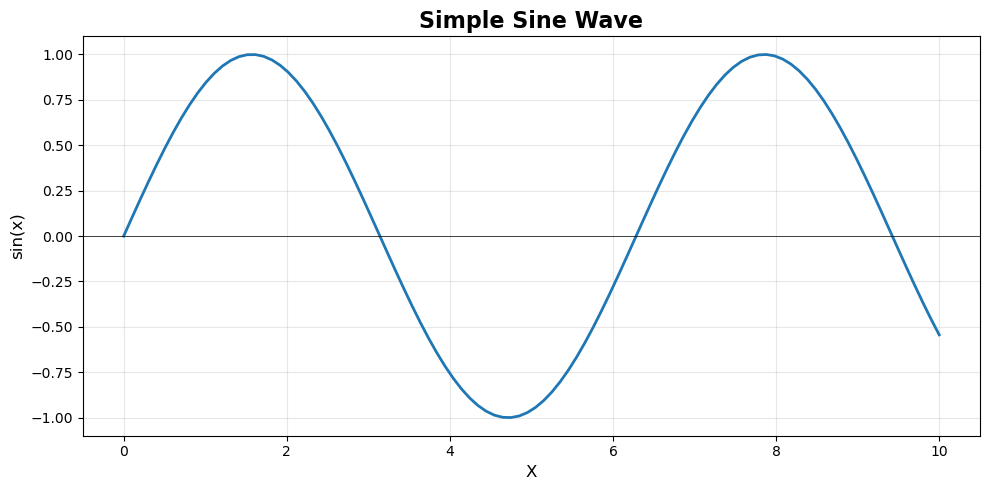


Example 2: Multiple Lines on Same Axes


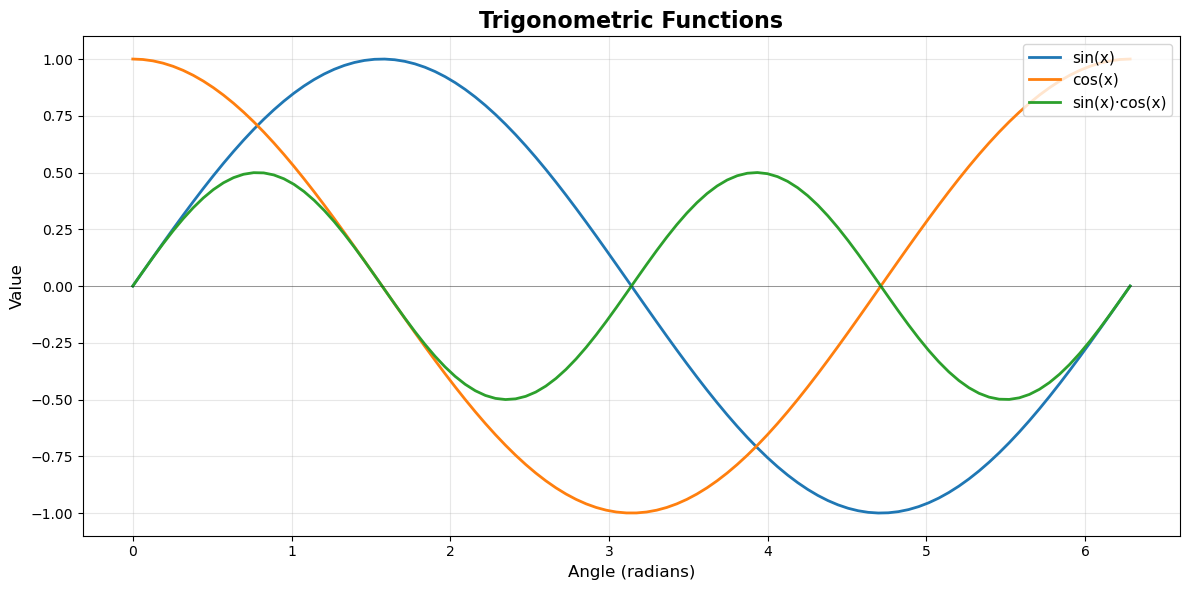


Example 3: Temperature Data Over Time


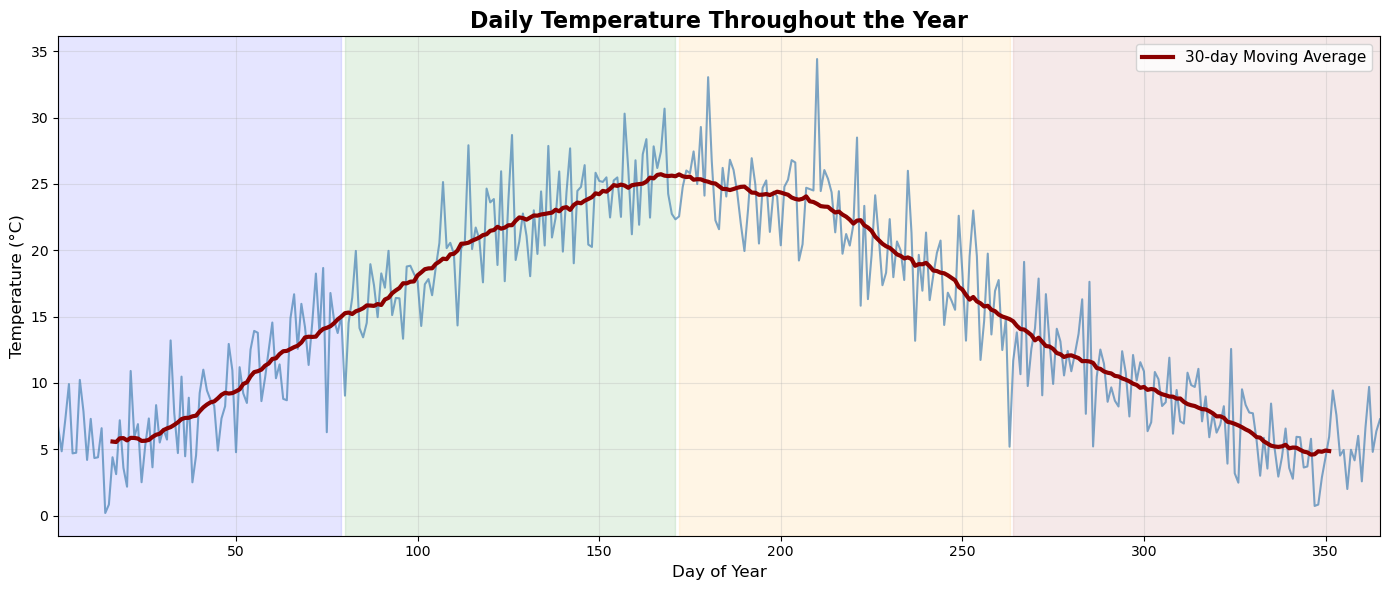


✅ Basic line plots complete!


In [2]:
print("=== BASIC LINE PLOTS ===\n")

# Example 1: Simple line plot
print("Example 1: Simple Line Plot")
fig, ax = plt.subplots(figsize=(10, 5))

x = np.linspace(0, 10, 100)
y = np.sin(x)

ax.plot(x, y, linewidth=2)
ax.set_title('Simple Sine Wave', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('sin(x)', fontsize=12)
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

# Example 2: Multiple lines
print("\n" + "="*70)
print("Example 2: Multiple Lines on Same Axes")
print("="*70)

fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(0, 2*np.pi, 100)
ax.plot(x, np.sin(x), linewidth=2, label='sin(x)')
ax.plot(x, np.cos(x), linewidth=2, label='cos(x)')
ax.plot(x, np.sin(x) * np.cos(x), linewidth=2, label='sin(x)·cos(x)')

ax.set_title('Trigonometric Functions', fontsize=16, fontweight='bold')
ax.set_xlabel('Angle (radians)', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

# Example 3: Real-world data (temperature)
print("\n" + "="*70)
print("Example 3: Temperature Data Over Time")
print("="*70)

# Generate sample temperature data
days = np.arange(1, 366)  # One year
# Seasonal pattern + random variation
temp = 15 + 10 * np.sin((days - 80) * 2 * np.pi / 365) + np.random.randn(365) * 3

fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(days, temp, linewidth=1.5, color='steelblue', alpha=0.7)

# Add moving average
window = 30
temp_ma = pd.Series(temp).rolling(window=window, center=True).mean()
ax.plot(days, temp_ma, linewidth=3, color='darkred', label=f'{window}-day Moving Average')

ax.set_title('Daily Temperature Throughout the Year', fontsize=16, fontweight='bold')
ax.set_xlabel('Day of Year', fontsize=12)
ax.set_ylabel('Temperature (°C)', fontsize=12)
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(1, 365)

# Add season labels
ax.axvspan(1, 79, alpha=0.1, color='blue', label='Winter')
ax.axvspan(80, 171, alpha=0.1, color='green')
ax.axvspan(172, 263, alpha=0.1, color='orange')
ax.axvspan(264, 365, alpha=0.1, color='brown')

plt.tight_layout()
plt.show()

print("\n✅ Basic line plots complete!")

## 2. Line Styles

### Built-in Line Styles

```python
'-'   # Solid line (default)
'--'  # Dashed line
'-.'  # Dash-dot line
':'   # Dotted line
''    # No line (markers only)
```

### Usage

```python
# Method 1: Parameter
ax.plot(x, y, linestyle='--')

# Method 2: Shorthand
ax.plot(x, y, '--')

# Method 3: With color and marker
ax.plot(x, y, 'r--')  # Red dashed line
```

### Custom Dash Patterns

```python
# Define custom pattern: (on, off, on, off, ...)
ax.plot(x, y, linestyle=(0, (5, 2, 5, 2)))  # 5pt on, 2pt off
ax.plot(x, y, linestyle=(0, (3, 1, 1, 1)))  # Dash-dot-dot
ax.plot(x, y, linestyle=(0, (1, 1)))        # Tightly dotted

# Or use dashes parameter
ax.plot(x, y, dashes=[10, 5, 20, 5])  # Complex pattern
```

### When to Use Which Style

```
Solid (-)      → Primary data, main trend
Dashed (--)    → Secondary data, comparison
Dash-dot (-.)  → Predictions, projections
Dotted (:)     → Reference lines, thresholds
```

### Line Style Best Practices

**Do:**
```
✓ Use solid for most important data
✓ Vary styles to distinguish lines
✓ Be consistent across similar plots
✓ Consider colorblind users
```

**Don't:**
```
✗ Mix too many styles (confusing)
✗ Use dotted for thick lines
✗ Rely only on style (use color too)
```

=== LINE STYLES ===

Example 1: Built-in Line Styles


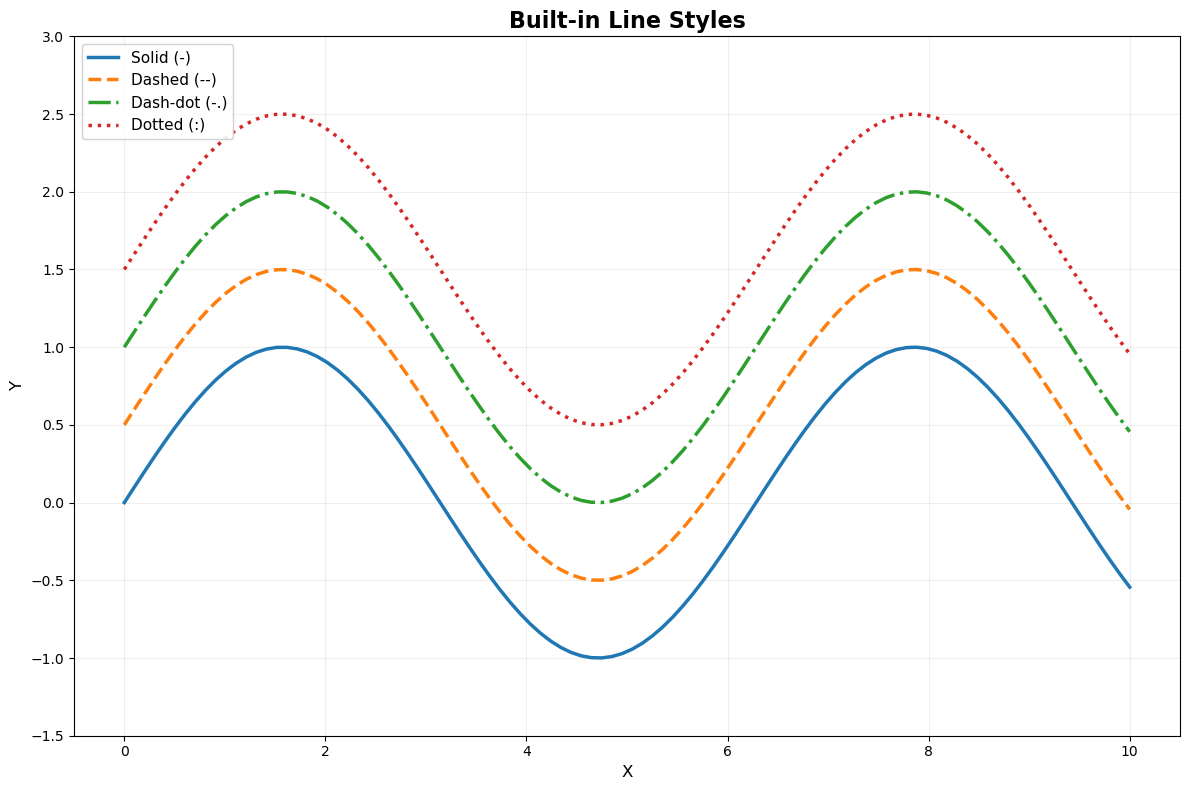


Example 2: Custom Dash Patterns


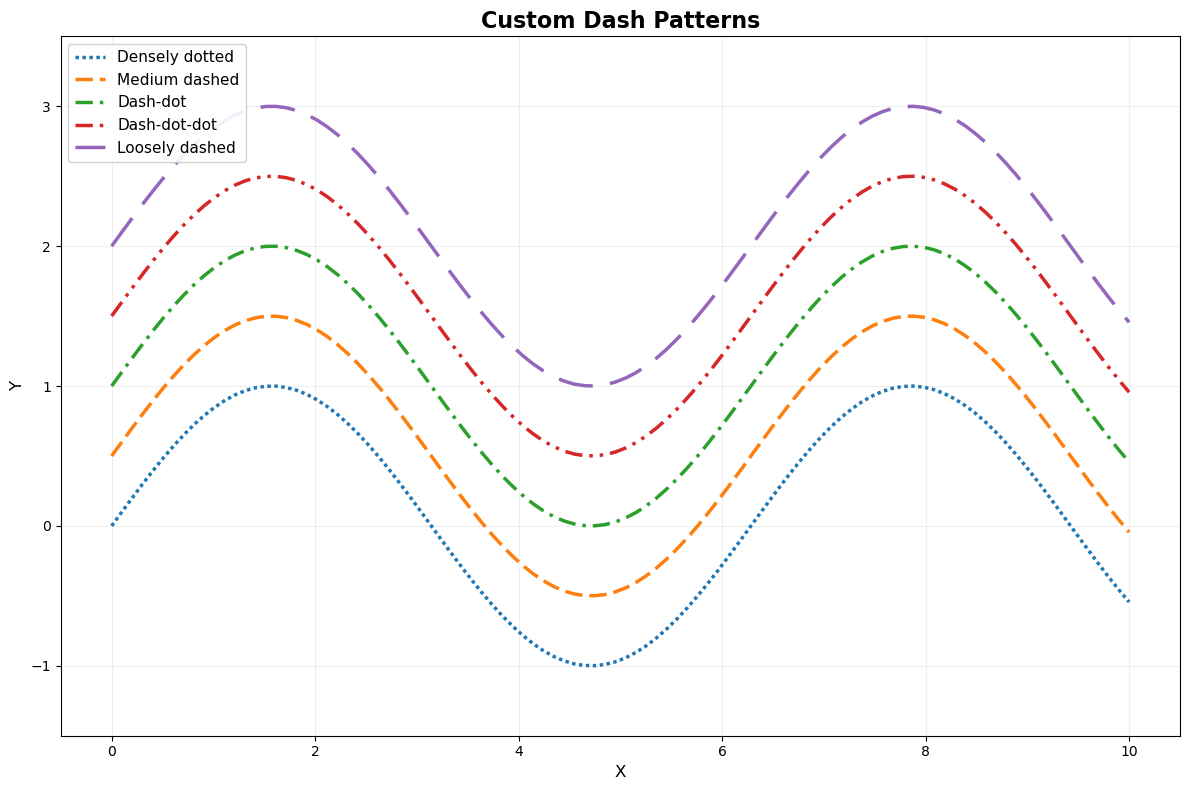


Example 3: Actual vs Predicted Sales


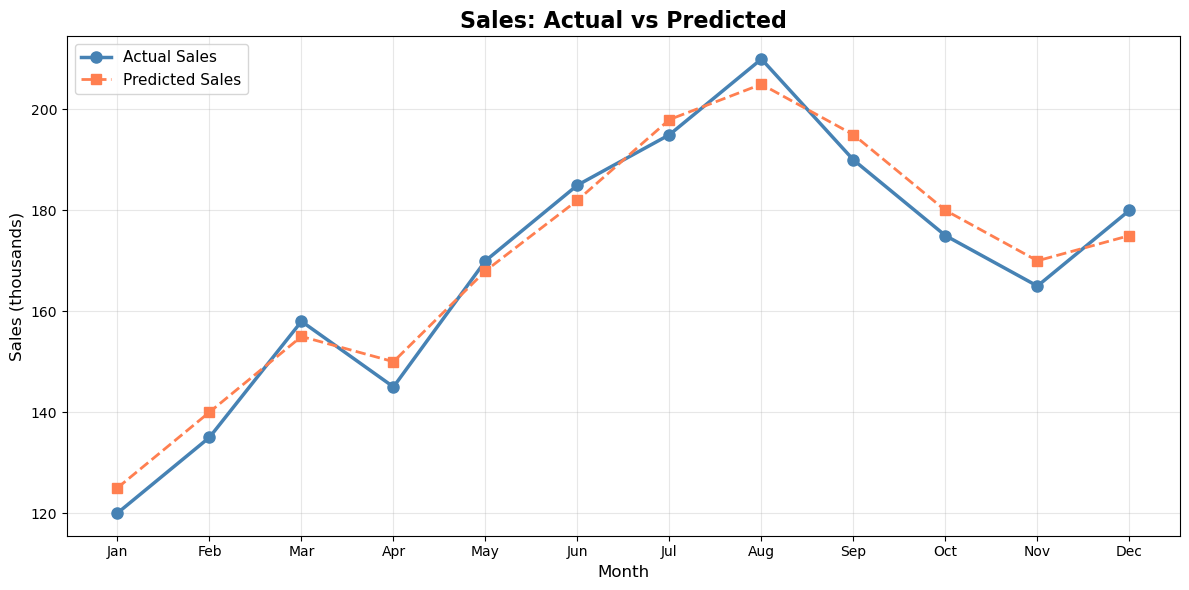


💡 Tip: Use solid lines for actual data, dashed for predictions


In [3]:
print("=== LINE STYLES ===\n")

# Example 1: All built-in line styles
print("Example 1: Built-in Line Styles")

fig, ax = plt.subplots(figsize=(12, 8))

x = np.linspace(0, 10, 100)
styles = ['-', '--', '-.', ':']
labels = ['Solid (-)', 'Dashed (--)', 'Dash-dot (-.)', 'Dotted (:)']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, (style, label, color) in enumerate(zip(styles, labels, colors)):
    y = np.sin(x) + i * 0.5
    ax.plot(x, y, linestyle=style, linewidth=2.5, color=color, label=label)

ax.set_title('Built-in Line Styles', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.2)
ax.set_ylim(-1.5, 3)

plt.tight_layout()
plt.show()

# Example 2: Custom dash patterns
print("\n" + "="*70)
print("Example 2: Custom Dash Patterns")
print("="*70)

fig, ax = plt.subplots(figsize=(12, 8))

x = np.linspace(0, 10, 100)
patterns = [
    (0, (1, 1)),           # Densely dotted
    (0, (5, 2)),           # Medium dashed
    (0, (5, 2, 1, 2)),     # Dash-dot
    (0, (5, 2, 1, 2, 1, 2)),  # Dash-dot-dot
    (0, (10, 5)),          # Loosely dashed
]
labels = [
    'Densely dotted',
    'Medium dashed',
    'Dash-dot',
    'Dash-dot-dot',
    'Loosely dashed'
]

for i, (pattern, label) in enumerate(zip(patterns, labels)):
    y = np.sin(x) + i * 0.5
    ax.plot(x, y, linestyle=pattern, linewidth=2.5, label=label)

ax.set_title('Custom Dash Patterns', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.2)
ax.set_ylim(-1.5, 3.5)

plt.tight_layout()
plt.show()

# Example 3: Practical use case
print("\n" + "="*70)
print("Example 3: Actual vs Predicted Sales")
print("="*70)

fig, ax = plt.subplots(figsize=(12, 6))

months = np.arange(1, 13)
actual = np.array([120, 135, 158, 145, 170, 185, 195, 210, 190, 175, 165, 180])
predicted = np.array([125, 140, 155, 150, 168, 182, 198, 205, 195, 180, 170, 175])

ax.plot(months, actual, 'o-', linewidth=2.5, markersize=8, 
        color='steelblue', label='Actual Sales')
ax.plot(months, predicted, 's--', linewidth=2, markersize=7, 
        color='coral', label='Predicted Sales')

ax.set_title('Sales: Actual vs Predicted', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Sales (thousands)', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xticks(months)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

print("\n💡 Tip: Use solid lines for actual data, dashed for predictions")

## 3. Colors & Color Cycles

### Color Specification Methods

**1. Single Character Colors**
```python
'b'  # Blue
'g'  # Green
'r'  # Red
'c'  # Cyan
'm'  # Magenta
'y'  # Yellow
'k'  # Black
'w'  # White
```

**2. Named Colors (140+ available)**
```python
'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white'
'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'navy'
'steelblue', 'coral', 'teal', 'crimson', 'gold', 'silver'
```

**3. Hex Colors**
```python
'#FF5733'   # Orange-red
'#3498DB'   # Blue
'#2ECC71'   # Green
```

**4. RGB Tuples (0-1)**
```python
(1.0, 0.0, 0.0)     # Red
(0.5, 0.5, 0.5)     # Gray
(0.2, 0.4, 0.6)     # Custom blue
```

**5. RGBA Tuples (with alpha)**
```python
(1.0, 0.0, 0.0, 0.5)   # Semi-transparent red
```

### Default Color Cycle

Matplotlib automatically cycles through colors:
```python
# Default colors (C0 to C9)
'C0'  # Blue
'C1'  # Orange
'C2'  # Green
'C3'  # Red
'C4'  # Purple
'C5'  # Brown
'C6'  # Pink
'C7'  # Gray
'C8'  # Olive
'C9'  # Cyan
```

### Custom Color Cycles

```python
# Set custom colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'
])
```

### Colorblind-Friendly Palettes

```python
# Good for colorblindness
colors = ['#0173B2', '#DE8F05', '#029E73', '#CC78BC',
          '#CA9161', '#949494', '#ECE133', '#56B4E9']

# Or use seaborn palettes
import seaborn as sns
colors = sns.color_palette('colorblind')
```

### Color Best Practices

```
✓ Use distinct colors for different data
✓ Consider colorblind users (8% of men)
✓ Avoid red-green combinations
✓ Use sequential colors for ordered data
✓ Use diverging colors for data with midpoint
✓ Limit to 7-8 colors max
✗ Don't use neon/bright colors
✗ Don't rely only on color (use markers/styles)
```

### Professional Color Schemes

```python
# Corporate/Business
business = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']

# Scientific (Nature-style)
nature = ['#E64B35', '#4DBBD5', '#00A087', '#3C5488', '#F39B7F']

# Colorblind-safe
safe = ['#0173B2', '#DE8F05', '#029E73', '#CC78BC']
```

=== COLORS AND COLOR CYCLES ===

Example 1: Color Specification Methods


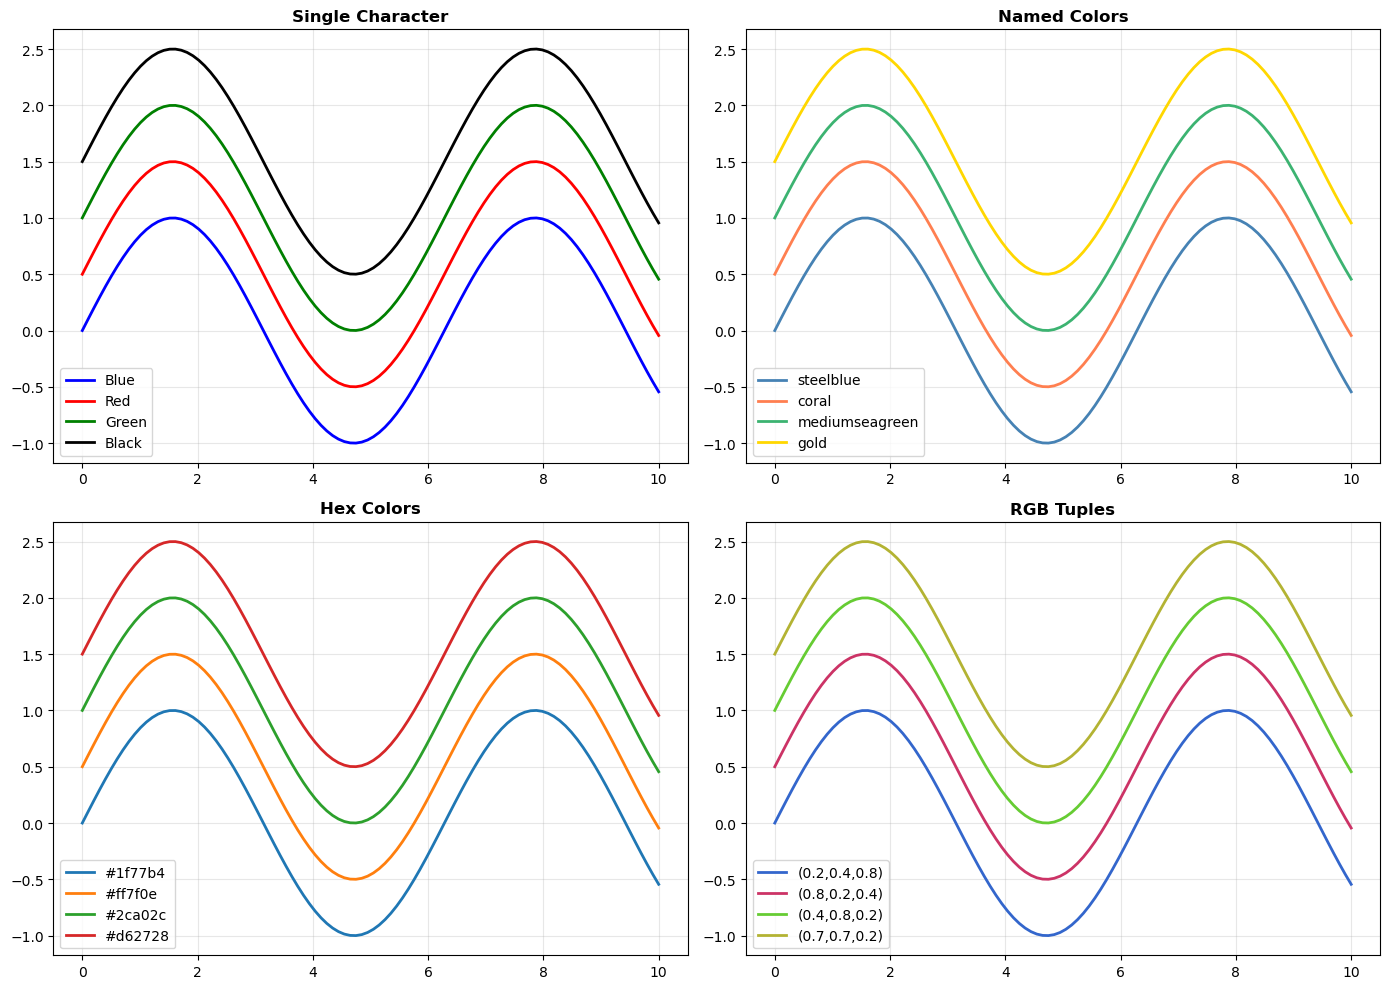


Example 2: Default Color Cycle (C0-C9)


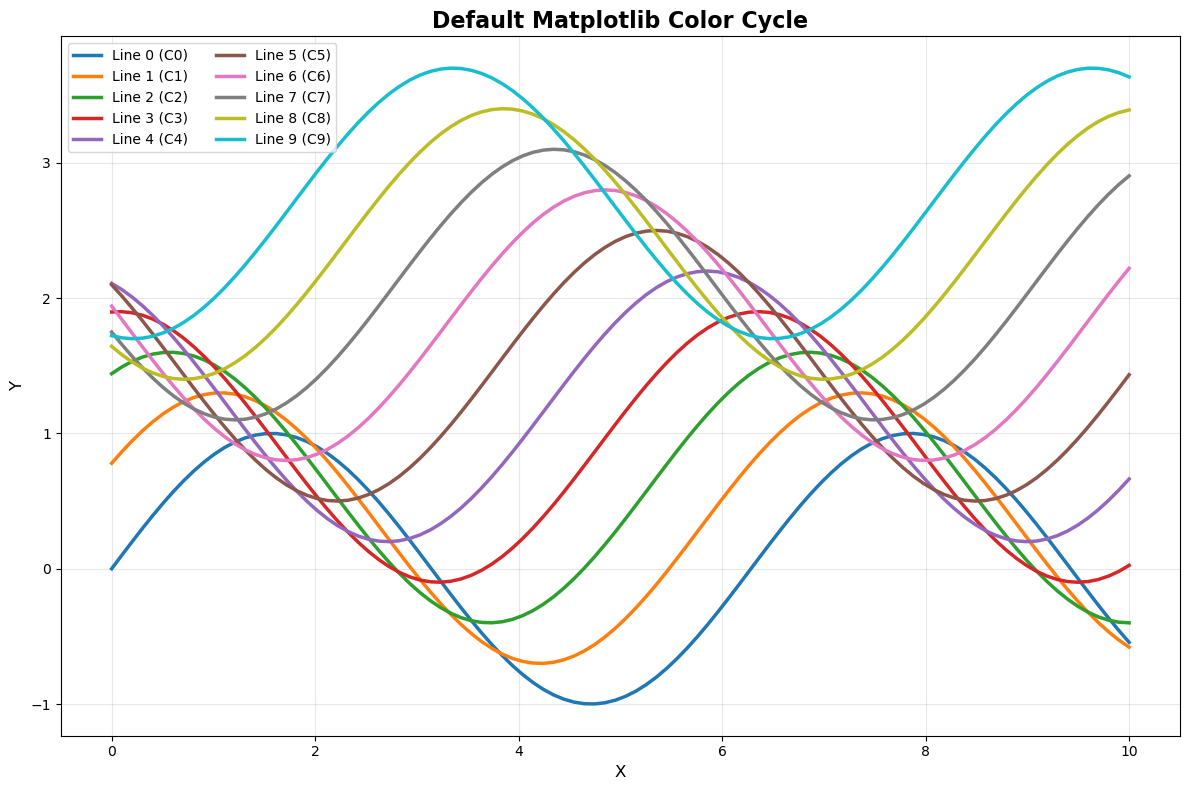


Example 3: Professional Color Schemes


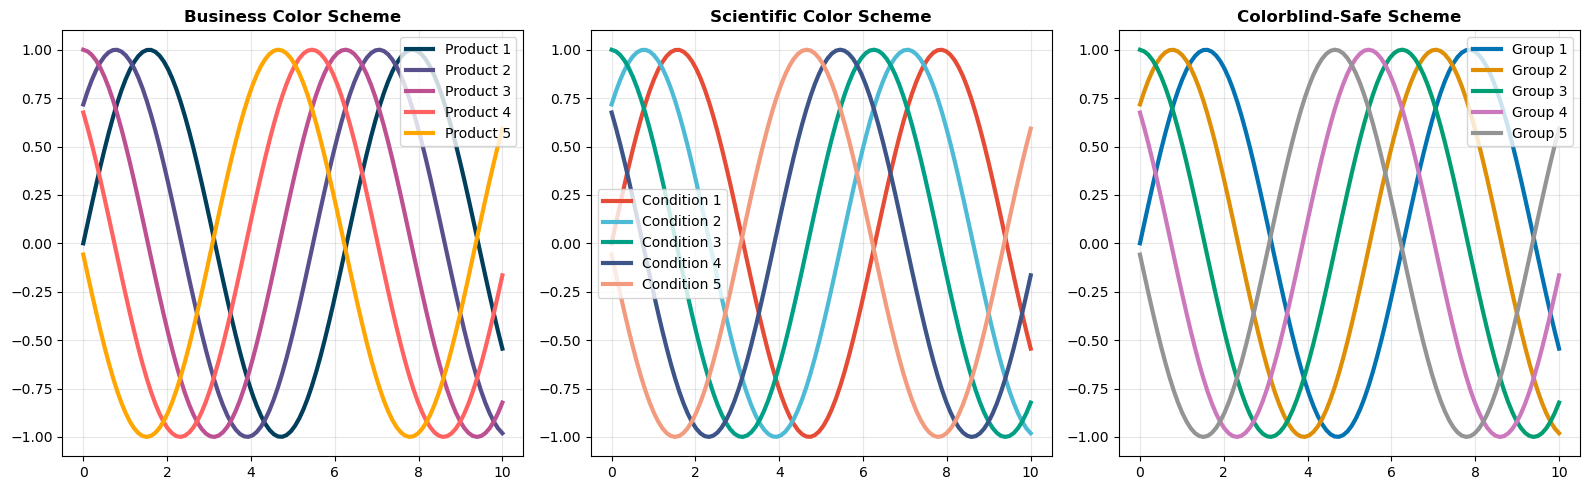


💡 Tip: Always consider colorblind users (~8% of men)
   Use tools like https://colorbrewer2.org/ for safe palettes


In [4]:
print("=== COLORS AND COLOR CYCLES ===\n")

# Example 1: Different color specification methods
print("Example 1: Color Specification Methods")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
x = np.linspace(0, 10, 100)

# Single character
for i, (color, label) in enumerate([('b', 'Blue'), ('r', 'Red'), 
                                     ('g', 'Green'), ('k', 'Black')]):
    axes[0, 0].plot(x, np.sin(x) + i*0.5, color=color, linewidth=2, label=label)
axes[0, 0].set_title('Single Character', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Named colors
named_colors = ['steelblue', 'coral', 'mediumseagreen', 'gold']
for i, color in enumerate(named_colors):
    axes[0, 1].plot(x, np.sin(x) + i*0.5, color=color, linewidth=2, label=color)
axes[0, 1].set_title('Named Colors', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Hex colors
hex_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i, color in enumerate(hex_colors):
    axes[1, 0].plot(x, np.sin(x) + i*0.5, color=color, linewidth=2, label=color)
axes[1, 0].set_title('Hex Colors', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# RGB tuples
rgb_colors = [(0.2, 0.4, 0.8), (0.8, 0.2, 0.4), (0.4, 0.8, 0.2), (0.7, 0.7, 0.2)]
labels = ['(0.2,0.4,0.8)', '(0.8,0.2,0.4)', '(0.4,0.8,0.2)', '(0.7,0.7,0.2)']
for i, (color, label) in enumerate(zip(rgb_colors, labels)):
    axes[1, 1].plot(x, np.sin(x) + i*0.5, color=color, linewidth=2, label=label)
axes[1, 1].set_title('RGB Tuples', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Example 2: Default color cycle
print("\n" + "="*70)
print("Example 2: Default Color Cycle (C0-C9)")
print("="*70)

fig, ax = plt.subplots(figsize=(12, 8))

for i in range(10):
    ax.plot(x, np.sin(x + i*0.5) + i*0.3, linewidth=2.5, label=f'Line {i} (C{i})')

ax.set_title('Default Matplotlib Color Cycle', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.legend(loc='upper left', ncol=2, fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Example 3: Professional color schemes
print("\n" + "="*70)
print("Example 3: Professional Color Schemes")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Business colors
business = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600']
for i, color in enumerate(business):
    axes[0].plot(x, np.sin(x + i*0.8), color=color, linewidth=3, label=f'Product {i+1}')
axes[0].set_title('Business Color Scheme', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scientific colors
nature = ['#E64B35', '#4DBBD5', '#00A087', '#3C5488', '#F39B7F']
for i, color in enumerate(nature):
    axes[1].plot(x, np.sin(x + i*0.8), color=color, linewidth=3, label=f'Condition {i+1}')
axes[1].set_title('Scientific Color Scheme', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Colorblind-safe
safe = ['#0173B2', '#DE8F05', '#029E73', '#CC78BC', '#949494']
for i, color in enumerate(safe):
    axes[2].plot(x, np.sin(x + i*0.8), color=color, linewidth=3, label=f'Group {i+1}')
axes[2].set_title('Colorblind-Safe Scheme', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Tip: Always consider colorblind users (~8% of men)")
print("   Use tools like https://colorbrewer2.org/ for safe palettes")

## 4. Markers

### All Marker Styles

```python
# Points and pixels
'.'  # Point
','  # Pixel

# Circles
'o'  # Circle

# Triangles
'^'  # Triangle up
'v'  # Triangle down
'<'  # Triangle left
'>'  # Triangle right

# Squares and diamonds
's'  # Square
'D'  # Diamond
'd'  # Thin diamond

# Pentagons and hexagons
'p'  # Pentagon
'h'  # Hexagon1
'H'  # Hexagon2

# Stars and plus
'*'  # Star
'+'  # Plus
'x'  # X

# Lines
'|'  # Vertical line
'_'  # Horizontal line
```

### Marker Customization

```python
ax.plot(x, y,
        marker='o',                    # Marker style
        markersize=10,                 # Size
        markerfacecolor='red',         # Fill color
        markeredgecolor='black',       # Edge color
        markeredgewidth=1.5,           # Edge width
        markevery=5)                   # Show every 5th marker
```

### markevery Parameter

Control marker frequency:
```python
markevery=5          # Every 5th point
markevery=(2, 5)     # Start at 2, then every 5
markevery=[0, 5, 10] # Specific indices
markevery=slice(0, 100, 10)  # Slice notation
```

### When to Use Markers

```
✓ Few data points (< 20)
✓ Highlighting specific points
✓ Discrete measurements
✓ Data comparisons
✓ Publications (clarity)

✗ Many data points (> 100) - cluttered
✗ Continuous functions - unnecessary
✗ Dense time series - use lines only
```

### Best Practices

```python
# ✓ Sparse markers for clarity
ax.plot(x, y, 'o-', markevery=10)  # Every 10th point

# ✓ Different markers for different datasets
ax.plot(x, y1, 'o-', label='Data 1')
ax.plot(x, y2, 's-', label='Data 2')

# ✗ Too many markers
ax.plot(x, y, 'o-', markersize=10)  # 100+ cluttered markers

# ✓ Contrasting marker edges
ax.plot(x, y, 'o-', markerfacecolor='white', 
        markeredgecolor='blue', markeredgewidth=2)
```

=== MARKERS ===

Example 1: All Marker Styles


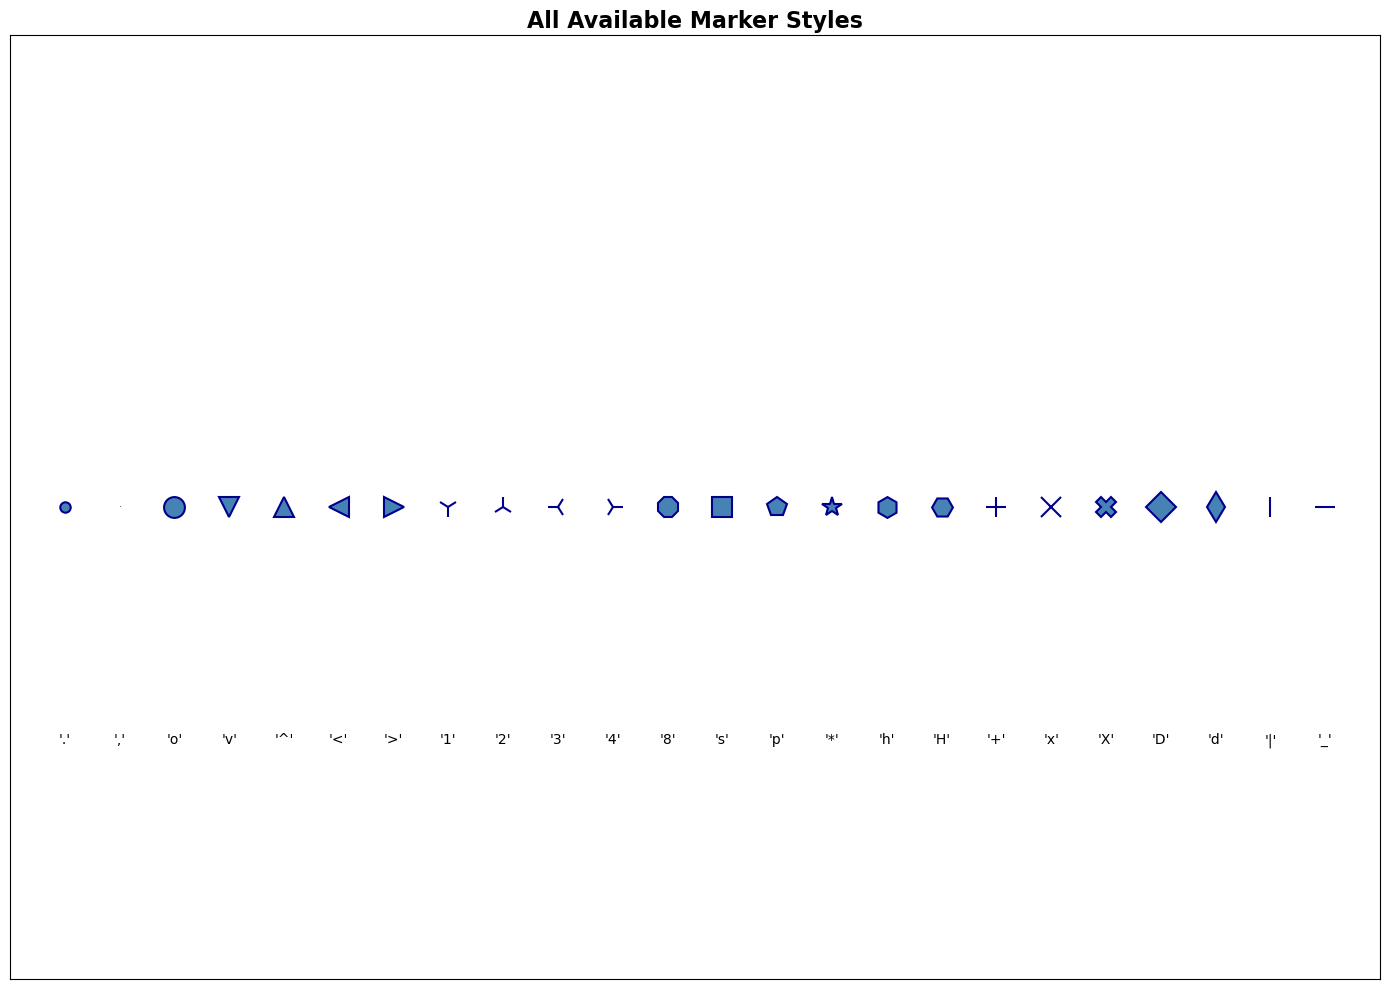


Example 2: Marker Customization


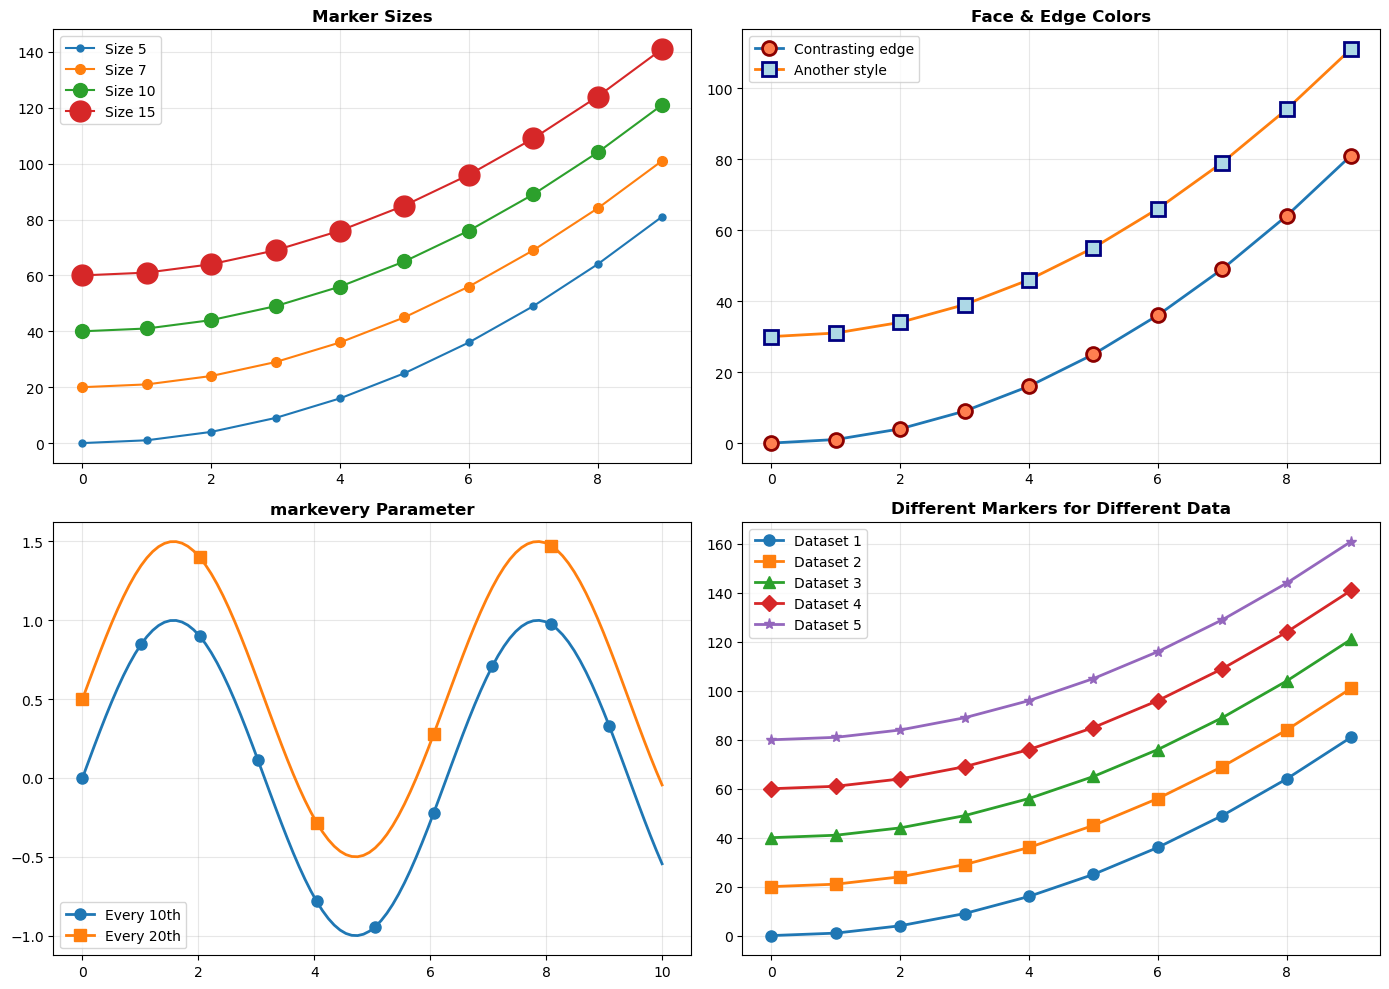


Example 3: Experimental Data with Markers


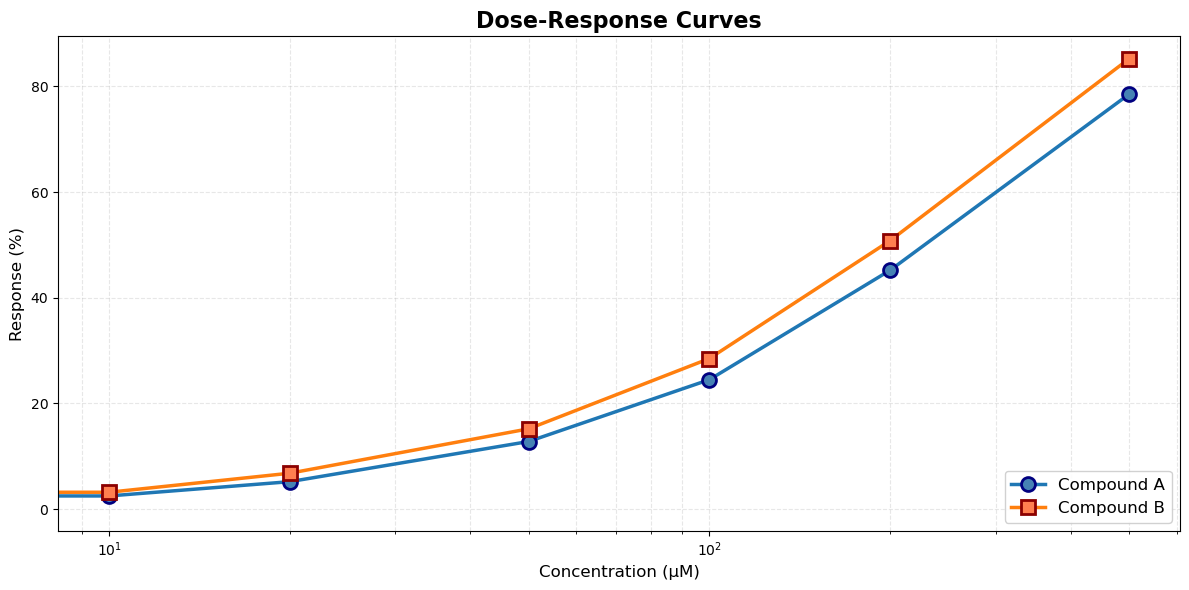


💡 Tip: Use markers for discrete data points
   Use markevery for dense data to avoid clutter


In [5]:
print("=== MARKERS ===\n")

# Example 1: All marker types
print("Example 1: All Marker Styles")

fig, ax = plt.subplots(figsize=(14, 10))

markers = ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8',
           's', 'p', '*', 'h', 'H', '+', 'x', 'X', 'D', 'd', '|', '_']
x = np.arange(len(markers))
y = np.ones(len(markers))

for i, marker in enumerate(markers):
    ax.plot(i, 1, marker=marker, markersize=15, color='steelblue',
            markeredgecolor='darkblue', markeredgewidth=1.5)
    ax.text(i, 0.85, f"'{marker}'", ha='center', fontsize=10)

ax.set_xlim(-1, len(markers))
ax.set_ylim(0.7, 1.3)
ax.set_title('All Available Marker Styles', fontsize=16, fontweight='bold')
ax.set_yticks([])
ax.set_xticks([])
ax.grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Example 2: Marker customization
print("\n" + "="*70)
print("Example 2: Marker Customization")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

x = np.arange(10)
y = x ** 2

# Size variation
sizes = [5, 7, 10, 15]
for i, size in enumerate(sizes):
    axes[0, 0].plot(x, y + i*20, 'o-', markersize=size, label=f'Size {size}')
axes[0, 0].set_title('Marker Sizes', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Face and edge colors
axes[0, 1].plot(x, y, 'o-', markersize=10, markerfacecolor='coral',
                markeredgecolor='darkred', markeredgewidth=2, 
                linewidth=2, label='Contrasting edge')
axes[0, 1].plot(x, y + 30, 's-', markersize=10, markerfacecolor='lightblue',
                markeredgecolor='navy', markeredgewidth=2,
                linewidth=2, label='Another style')
axes[0, 1].set_title('Face & Edge Colors', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# markevery parameter
x_dense = np.linspace(0, 10, 100)
y_dense = np.sin(x_dense)
axes[1, 0].plot(x_dense, y_dense, 'o-', markevery=10, markersize=8, 
                label='Every 10th', linewidth=2)
axes[1, 0].plot(x_dense, y_dense + 0.5, 's-', markevery=20, markersize=8,
                label='Every 20th', linewidth=2)
axes[1, 0].set_title('markevery Parameter', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Different markers for different data
markers_demo = ['o', 's', '^', 'D', '*']
for i, marker in enumerate(markers_demo):
    axes[1, 1].plot(x, y + i*20, marker=marker, linestyle='-', 
                    markersize=8, linewidth=2, label=f'Dataset {i+1}')
axes[1, 1].set_title('Different Markers for Different Data', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Example 3: Practical use - data points
print("\n" + "="*70)
print("Example 3: Experimental Data with Markers")
print("="*70)

fig, ax = plt.subplots(figsize=(12, 6))

# Simulate experimental data
concentrations = np.array([0, 10, 20, 50, 100, 200, 500])
response_a = np.array([0.1, 2.5, 5.2, 12.8, 24.5, 45.2, 78.5])
response_b = np.array([0.2, 3.2, 6.8, 15.2, 28.5, 50.8, 85.2])

ax.plot(concentrations, response_a, 'o-', linewidth=2.5, markersize=10,
        markerfacecolor='steelblue', markeredgecolor='navy',
        markeredgewidth=2, label='Compound A')
ax.plot(concentrations, response_b, 's-', linewidth=2.5, markersize=10,
        markerfacecolor='coral', markeredgecolor='darkred',
        markeredgewidth=2, label='Compound B')

ax.set_title('Dose-Response Curves', fontsize=16, fontweight='bold')
ax.set_xlabel('Concentration (μM)', fontsize=12)
ax.set_ylabel('Response (%)', fontsize=12)
ax.legend(loc='lower right', fontsize=12, framealpha=0.9)
ax.grid(True, alpha=0.3, which='both', linestyle='--')
ax.set_xscale('log')

plt.tight_layout()
plt.show()

print("\n💡 Tip: Use markers for discrete data points")
print("   Use markevery for dense data to avoid clutter")

## 5. Line Width & Transparency

### Line Width

```python
# Specify line width
ax.plot(x, y, linewidth=2)    # Full name
ax.plot(x, y, lw=2)           # Shorthand
```

**Typical Values:**
```python
0.5  # Very thin (reference lines)
1.0  # Thin (default in some contexts)
1.5  # Standard (default matplotlib)
2.0  # Medium (recommended for presentations)
2.5  # Thick (emphasis)
3.0+ # Very thick (main focus)
```

### Transparency (Alpha)

```python
# Alpha value: 0 (invisible) to 1 (opaque)
ax.plot(x, y, alpha=0.3)   # Very transparent
ax.plot(x, y, alpha=0.5)   # Semi-transparent
ax.plot(x, y, alpha=0.7)   # Slightly transparent
ax.plot(x, y, alpha=1.0)   # Fully opaque (default)
```

### When to Use Transparency

```
✓ Overlapping lines - show all data
✓ Background trends - emphasize foreground
✓ Uncertainty regions - shade confidence bands
✓ Many lines - reduce visual clutter
✓ Historical data - fade past data
```

### Visual Hierarchy

Use line width and alpha to create emphasis:

```python
# Primary data - thick and opaque
ax.plot(x, main_data, linewidth=3, alpha=1.0, color='steelblue')

# Secondary data - medium and semi-transparent
ax.plot(x, secondary_data, linewidth=2, alpha=0.6, color='gray')

# Reference/background - thin and transparent
ax.plot(x, reference, linewidth=1, alpha=0.3, color='lightgray')
```

### Best Practices

```python
# ✓ Create visual hierarchy
ax.plot(x, important, lw=3, alpha=1.0)    # Focus here
ax.plot(x, secondary, lw=1.5, alpha=0.5)  # Background

# ✓ Transparency for overlaps
for data in many_datasets:
    ax.plot(x, data, alpha=0.4)  # All visible

# ✗ Too thin for presentations
ax.plot(x, y, lw=0.5)  # Hard to see from distance

# ✓ Presentations: Use thicker lines
ax.plot(x, y, lw=2.5)  # Easy to see
```

### Context-Specific Guidelines

```python
# Papers/Publications
linewidth = 1.5-2.0
alpha = 1.0 (or 0.7 for overlaps)

# Presentations/Slides
linewidth = 2.5-3.0
alpha = 1.0 (bold is better)

# Web/Dashboard
linewidth = 2.0
alpha = 0.8 (subtle)

# Many overlapping lines
linewidth = 1.0-1.5
alpha = 0.3-0.5 (see through)
```

=== LINE WIDTH & TRANSPARENCY ===

Example 1: Line Width Comparison


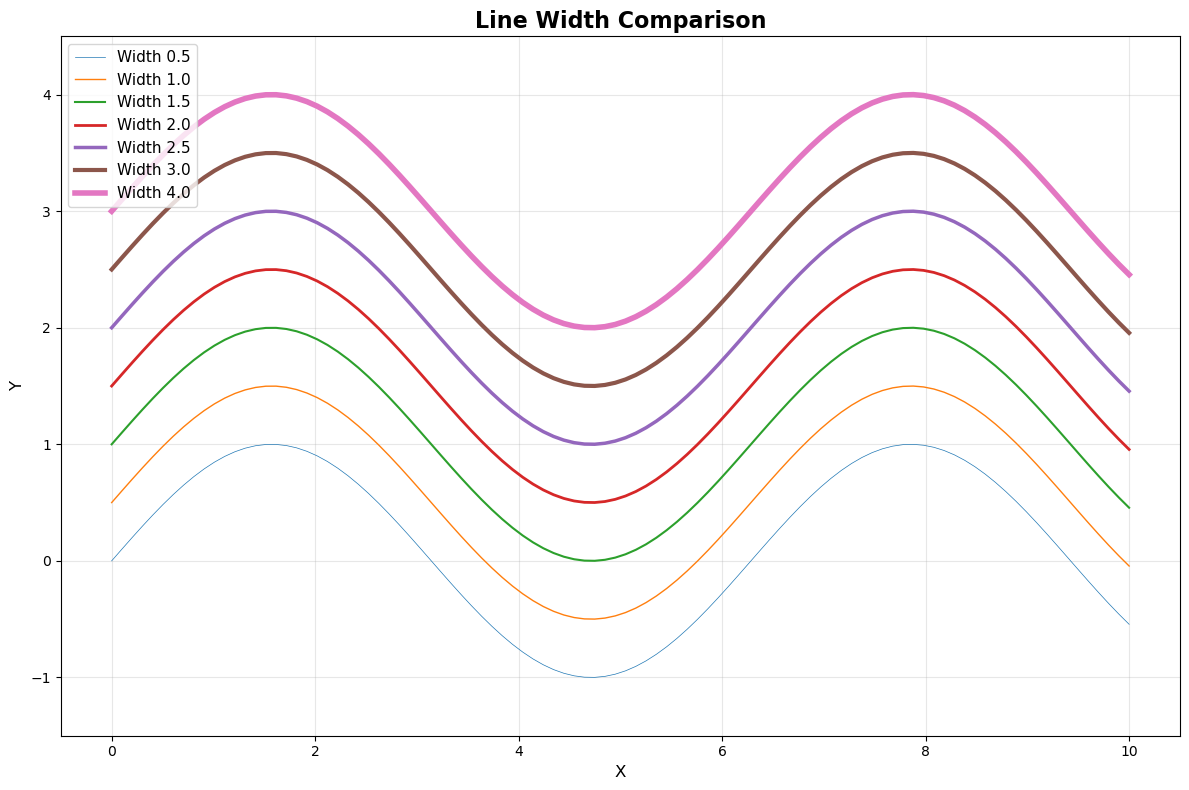


Example 2: Transparency (Alpha) Comparison


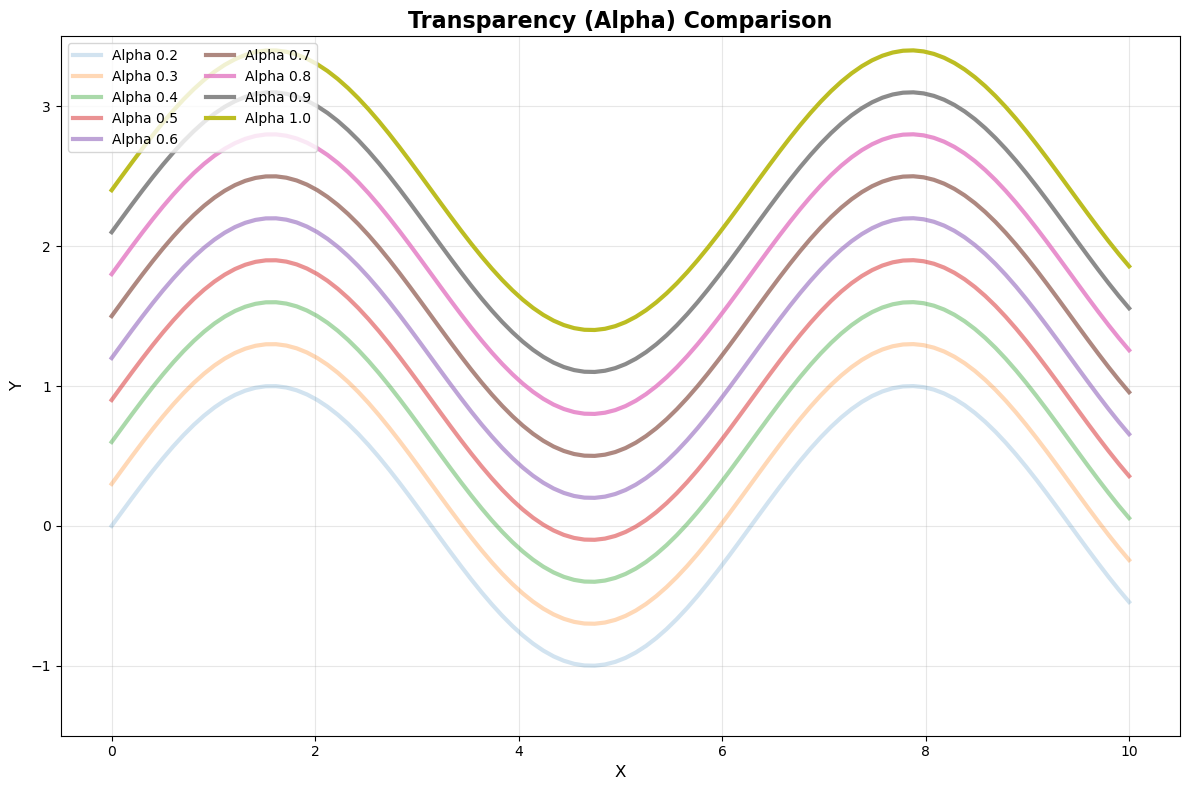


Example 3: Visual Hierarchy (Emphasis)


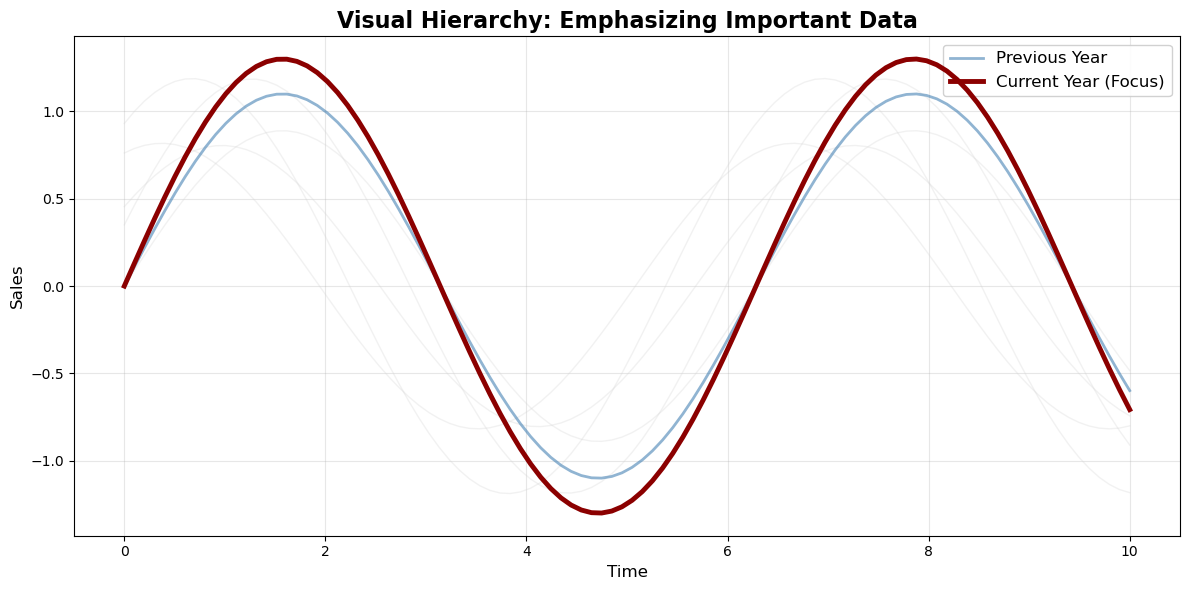


Example 4: Many Overlapping Lines


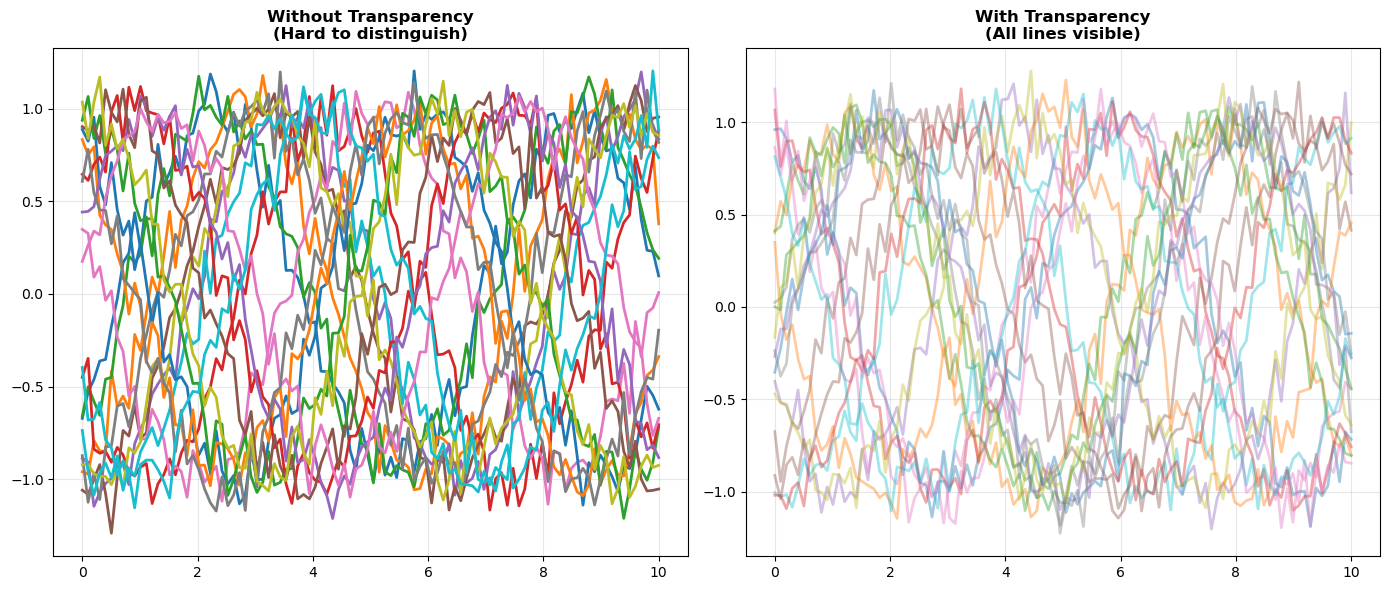


💡 Tips:
   • Presentations: Use lw=2.5-3.0 (visible from distance)
   • Publications: Use lw=1.5-2.0 (standard)
   • Overlapping data: Use alpha=0.3-0.5
   • Visual hierarchy: Vary both width and alpha


In [6]:
print("=== LINE WIDTH & TRANSPARENCY ===\n")

# Example 1: Line width comparison
print("Example 1: Line Width Comparison")

fig, ax = plt.subplots(figsize=(12, 8))

x = np.linspace(0, 10, 100)
widths = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0]

for i, width in enumerate(widths):
    y = np.sin(x) + i * 0.5
    ax.plot(x, y, linewidth=width, label=f'Width {width}')

ax.set_title('Line Width Comparison', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_ylim(-1.5, 4.5)

plt.tight_layout()
plt.show()

# Example 2: Transparency (alpha) comparison
print("\n" + "="*70)
print("Example 2: Transparency (Alpha) Comparison")
print("="*70)

fig, ax = plt.subplots(figsize=(12, 8))

alphas = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for i, alpha in enumerate(alphas):
    y = np.sin(x) + i * 0.3
    ax.plot(x, y, linewidth=3, alpha=alpha, label=f'Alpha {alpha}')

ax.set_title('Transparency (Alpha) Comparison', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.legend(loc='upper left', fontsize=10, ncol=2)
ax.grid(True, alpha=0.3)
ax.set_ylim(-1.5, 3.5)

plt.tight_layout()
plt.show()

# Example 3: Visual hierarchy
print("\n" + "="*70)
print("Example 3: Visual Hierarchy (Emphasis)")
print("="*70)

fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(0, 10, 100)

# Background/historical data - thin and transparent
for i in range(5):
    y = np.sin(x + i*0.3) * np.random.uniform(0.8, 1.2)
    ax.plot(x, y, linewidth=1, alpha=0.3, color='lightgray')

# Secondary data - medium
ax.plot(x, np.sin(x) * 1.1, linewidth=2, alpha=0.6, 
        color='steelblue', label='Previous Year')

# Primary data - thick and bold
ax.plot(x, np.sin(x) * 1.3, linewidth=3.5, alpha=1.0, 
        color='darkred', label='Current Year (Focus)', zorder=10)

ax.set_title('Visual Hierarchy: Emphasizing Important Data', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Time', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)
ax.legend(loc='upper right', fontsize=12, framealpha=0.9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Example 4: Overlapping lines with transparency
print("\n" + "="*70)
print("Example 4: Many Overlapping Lines")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

x = np.linspace(0, 10, 100)

# Without transparency - hard to see
for i in range(20):
    y = np.sin(x + np.random.uniform(0, 2*np.pi)) + np.random.randn(100) * 0.1
    axes[0].plot(x, y, linewidth=2, alpha=1.0)
axes[0].set_title('Without Transparency\n(Hard to distinguish)', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# With transparency - all visible
for i in range(20):
    y = np.sin(x + np.random.uniform(0, 2*np.pi)) + np.random.randn(100) * 0.1
    axes[1].plot(x, y, linewidth=2, alpha=0.4)
axes[1].set_title('With Transparency\n(All lines visible)', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Tips:")
print("   • Presentations: Use lw=2.5-3.0 (visible from distance)")
print("   • Publications: Use lw=1.5-2.0 (standard)")
print("   • Overlapping data: Use alpha=0.3-0.5")
print("   • Visual hierarchy: Vary both width and alpha")

## 6. Legends

### Basic Legend

```python
# Add labels when plotting
ax.plot(x, y1, label='Dataset 1')
ax.plot(x, y2, label='Dataset 2')

# Show legend
ax.legend()
```

### Legend Positioning

```python
# Named locations
'best'          # Automatic (default)
'upper right'   # Top right
'upper left'    # Top left
'lower left'    # Bottom left
'lower right'   # Bottom right
'right'         # Right side
'center left'   # Left side
'center right'  # Right side
'lower center'  # Bottom center
'upper center'  # Top center
'center'        # Center

# Numeric codes (0-10)
0  # Best
1  # Upper right
2  # Upper left
3  # Lower left
4  # Lower right

# Custom position (bbox_to_anchor)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
```

### Legend Customization

```python
ax.legend(
    loc='best',              # Position
    fontsize=10,             # Font size
    frameon=True,            # Draw frame
    framealpha=0.9,          # Frame transparency
    fancybox=True,           # Rounded corners
    shadow=True,             # Drop shadow
    ncol=2,                  # Number of columns
    title='Legend Title',    # Title
    title_fontsize=12,       # Title font size
    edgecolor='black',       # Frame edge color
    facecolor='white',       # Background color
    borderpad=1,             # Padding
    labelspacing=0.5         # Space between entries
)
```

### Outside the Plot Area

```python
# Right side, outside
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Bottom, outside
ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)

# Adjust layout to fit legend
plt.tight_layout()
```

### Multiple Legends

```python
# First legend
legend1 = ax.legend(handles=[line1, line2], loc='upper left')
ax.add_artist(legend1)  # Keep first legend

# Second legend
ax.legend(handles=[line3, line4], loc='upper right')
```

### Custom Legend Entries

```python
# Manual labels (override plot labels)
ax.legend(['Label 1', 'Label 2', 'Label 3'])

# Specific handles and labels
handles = [line1, line2]
labels = ['Custom 1', 'Custom 2']
ax.legend(handles, labels)

# Fancy: Custom handles
from matplotlib.patches import Patch
handles = [Patch(facecolor='red', label='Category A'),
           Patch(facecolor='blue', label='Category B')]
ax.legend(handles=handles)
```

### Removing Legend

```python
# Don't show legend
ax.get_legend().remove()

# Or simply don't call legend()
```

### Best Practices

```
✓ Always add legend for multiple lines
✓ Use clear, descriptive labels
✓ Keep labels short (< 20 characters)
✓ Use 'best' location for automatic placement
✓ Place outside plot if it obscures data
✓ Use ncol for many entries
✗ Don't add legend for single line
✗ Avoid abbreviations users won't understand
```

=== LEGENDS ===

Example 1: Different Legend Positions


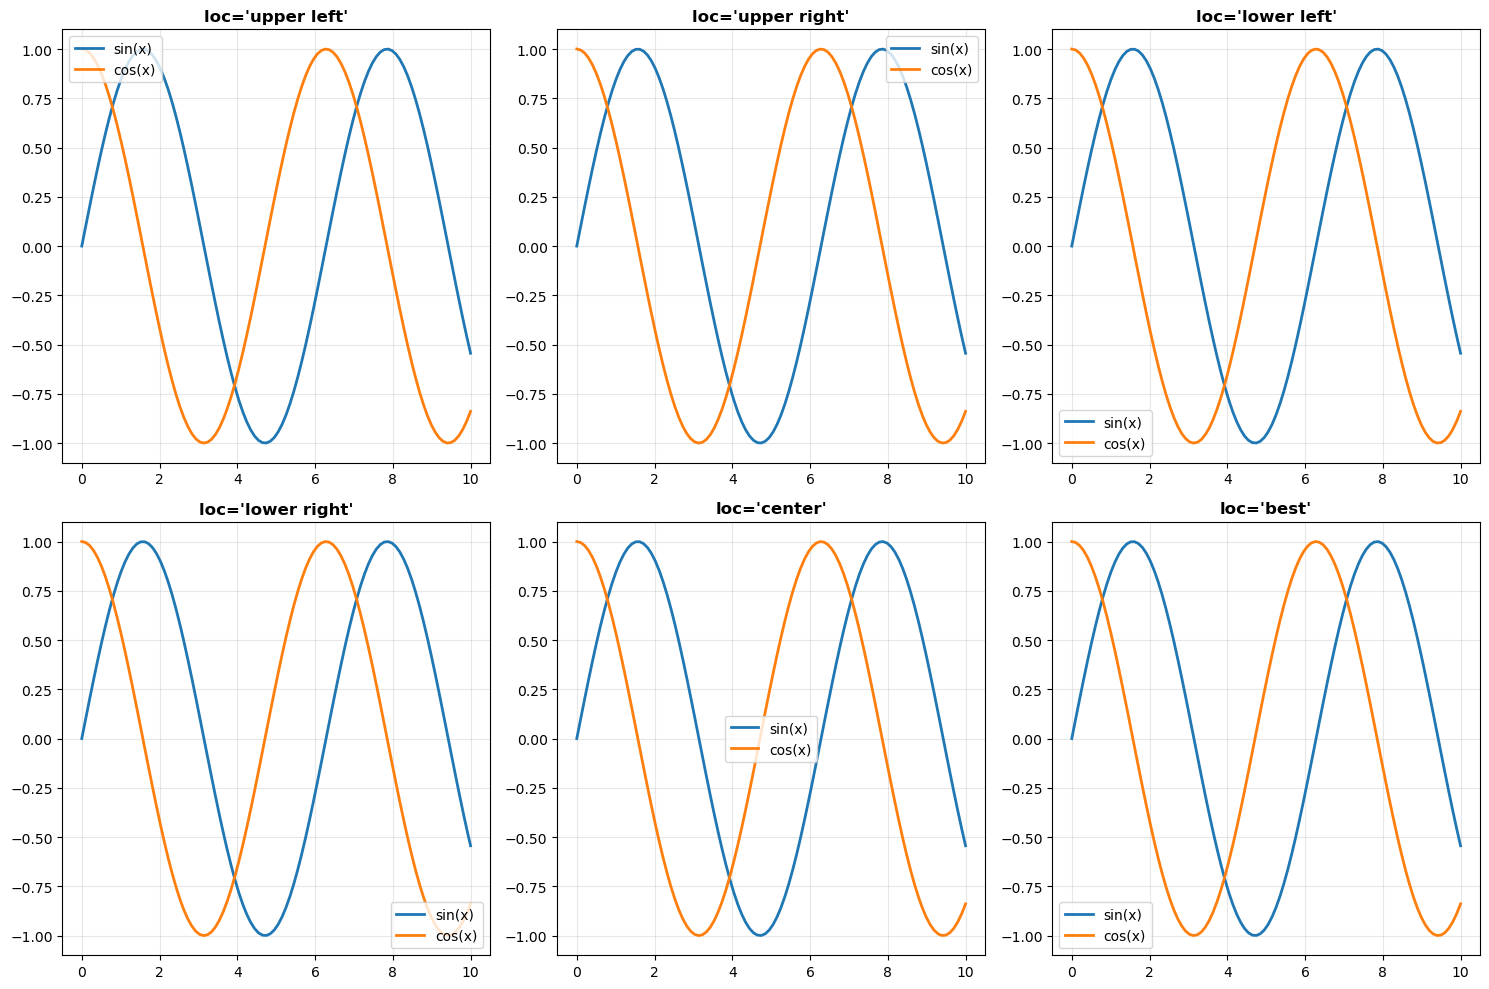


Example 2: Legend Customization


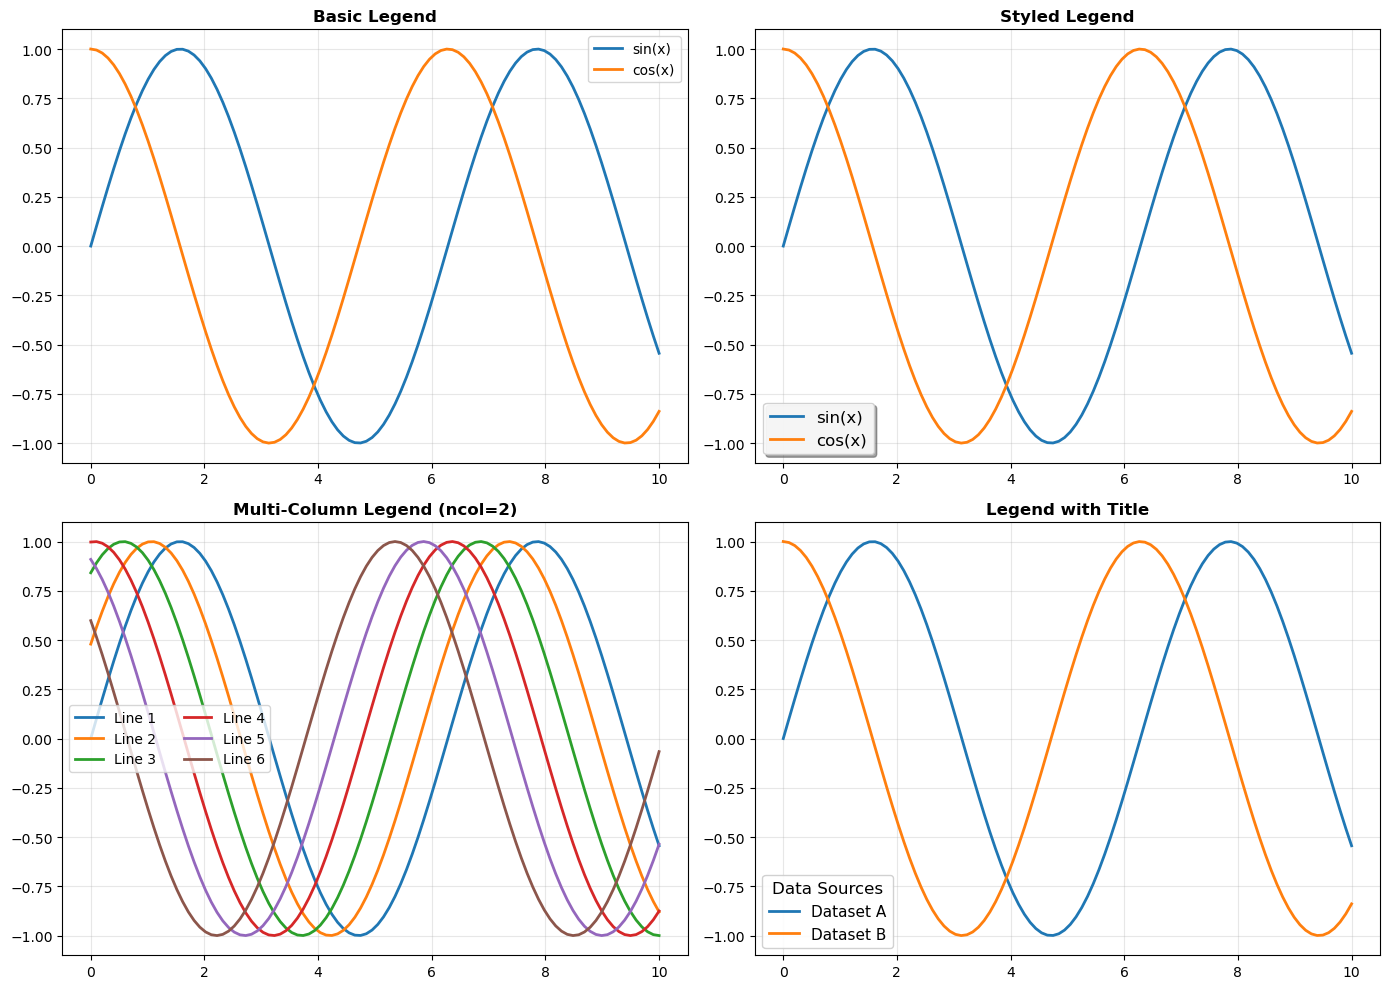


Example 3: Legend Outside Plot Area


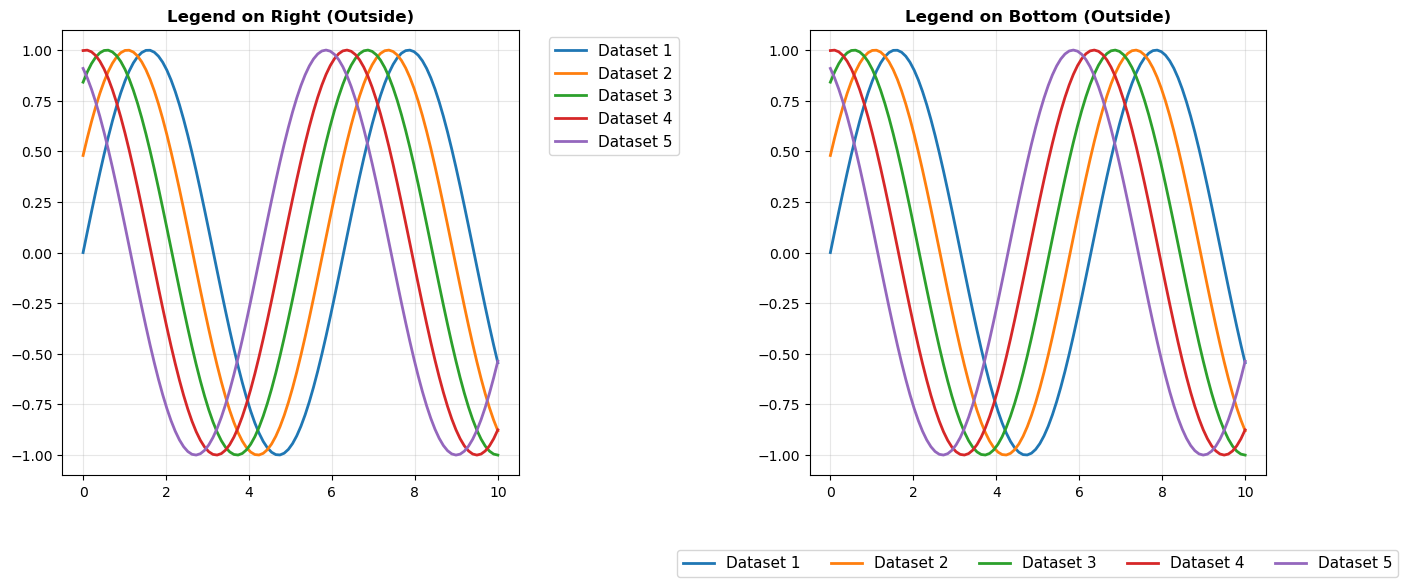


💡 Tips:
   • Use 'best' for automatic placement
   • Use bbox_to_anchor for outside placement
   • Use ncol for many entries
   • Keep labels short and descriptive


In [7]:
print("=== LEGENDS ===\n")

# Example 1: Legend positions
print("Example 1: Different Legend Positions")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
x = np.linspace(0, 10, 100)

positions = ['upper left', 'upper right', 'lower left', 
             'lower right', 'center', 'best']

for ax, pos in zip(axes.flat, positions):
    ax.plot(x, np.sin(x), label='sin(x)', linewidth=2)
    ax.plot(x, np.cos(x), label='cos(x)', linewidth=2)
    ax.legend(loc=pos)
    ax.set_title(f"loc='{pos}'", fontweight='bold')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Example 2: Legend customization
print("\n" + "="*70)
print("Example 2: Legend Customization")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

x = np.linspace(0, 10, 100)

# Basic legend
axes[0, 0].plot(x, np.sin(x), label='sin(x)', linewidth=2)
axes[0, 0].plot(x, np.cos(x), label='cos(x)', linewidth=2)
axes[0, 0].legend()
axes[0, 0].set_title('Basic Legend', fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Styled legend
axes[0, 1].plot(x, np.sin(x), label='sin(x)', linewidth=2)
axes[0, 1].plot(x, np.cos(x), label='cos(x)', linewidth=2)
axes[0, 1].legend(fontsize=12, frameon=True, fancybox=True, 
                  shadow=True, framealpha=0.9)
axes[0, 1].set_title('Styled Legend', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Multi-column legend
for i in range(6):
    axes[1, 0].plot(x, np.sin(x + i*0.5), label=f'Line {i+1}', linewidth=2)
axes[1, 0].legend(ncol=2, fontsize=10)
axes[1, 0].set_title('Multi-Column Legend (ncol=2)', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Legend with title
axes[1, 1].plot(x, np.sin(x), label='Dataset A', linewidth=2)
axes[1, 1].plot(x, np.cos(x), label='Dataset B', linewidth=2)
axes[1, 1].legend(title='Data Sources', title_fontsize=12, 
                  fontsize=11, framealpha=0.9)
axes[1, 1].set_title('Legend with Title', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Example 3: Legend outside plot area
print("\n" + "="*70)
print("Example 3: Legend Outside Plot Area")
print("="*70)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Right side, outside
for i in range(5):
    axes[0].plot(x, np.sin(x + i*0.5), label=f'Dataset {i+1}', linewidth=2)
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
axes[0].set_title('Legend on Right (Outside)', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Bottom, outside
for i in range(5):
    axes[1].plot(x, np.sin(x + i*0.5), label=f'Dataset {i+1}', linewidth=2)
axes[1].legend(bbox_to_anchor=(0.5, -0.15), loc='upper center', 
               ncol=5, fontsize=11)
axes[1].set_title('Legend on Bottom (Outside)', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Tips:")
print("   • Use 'best' for automatic placement")
print("   • Use bbox_to_anchor for outside placement")
print("   • Use ncol for many entries")
print("   • Keep labels short and descriptive")

## 7. Advanced Techniques

### Multiple Y-Axes (twinx)

Plot two datasets with different scales:

```python
fig, ax1 = plt.subplots()

# First y-axis (left)
ax1.plot(x, y1, 'b-', label='Data 1')
ax1.set_ylabel('Y1', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Second y-axis (right)
ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-', label='Data 2')
ax2.set_ylabel('Y2', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.show()
```

### Fill Between Lines

Shade area between curves:

```python
# Fill between two lines
ax.fill_between(x, y1, y2, alpha=0.3, label='Difference')

# Fill between line and zero
ax.fill_between(x, y, 0, alpha=0.3)

# Fill between line and another value
ax.fill_between(x, y, threshold, where=(y > threshold), alpha=0.3)
```

### Confidence Intervals

```python
# Main line
ax.plot(x, y_mean, linewidth=2, label='Mean')

# Confidence band
ax.fill_between(x, y_lower, y_upper, alpha=0.3, label='95% CI')
```

### Reference Lines

```python
# Horizontal line
ax.axhline(y=0, color='k', linestyle='--', linewidth=1, alpha=0.5)

# Vertical line
ax.axvline(x=5, color='r', linestyle='--', linewidth=1, alpha=0.5)

# Horizontal span (region)
ax.axhspan(ymin=-1, ymax=1, alpha=0.2, color='gray')

# Vertical span (region)
ax.axvspan(xmin=2, xmax=4, alpha=0.2, color='yellow')
```

### Stepped Lines

```python
# Step plot (like histogram)
ax.step(x, y, where='mid')   # Step at midpoint
ax.step(x, y, where='pre')   # Step before
ax.step(x, y, where='post')  # Step after
```

### Error Bars

```python
# Vertical error bars
ax.errorbar(x, y, yerr=error, fmt='o-', capsize=5)

# Horizontal error bars
ax.errorbar(x, y, xerr=error, fmt='o-', capsize=5)

# Both
ax.errorbar(x, y, xerr=x_error, yerr=y_error, fmt='o-', capsize=5)
```

### Log Scale

```python
# Log scale on y-axis
ax.set_yscale('log')

# Log scale on x-axis
ax.set_xscale('log')

# Both axes log scale
ax.set_xscale('log')
ax.set_yscale('log')
```

### Date Formatting

```python
import matplotlib.dates as mdates

# Format x-axis as dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Rotate date labels
plt.xticks(rotation=45)
```

=== ADVANCED TECHNIQUES ===

Example 1: Multiple Y-Axes (Temperature and Humidity)


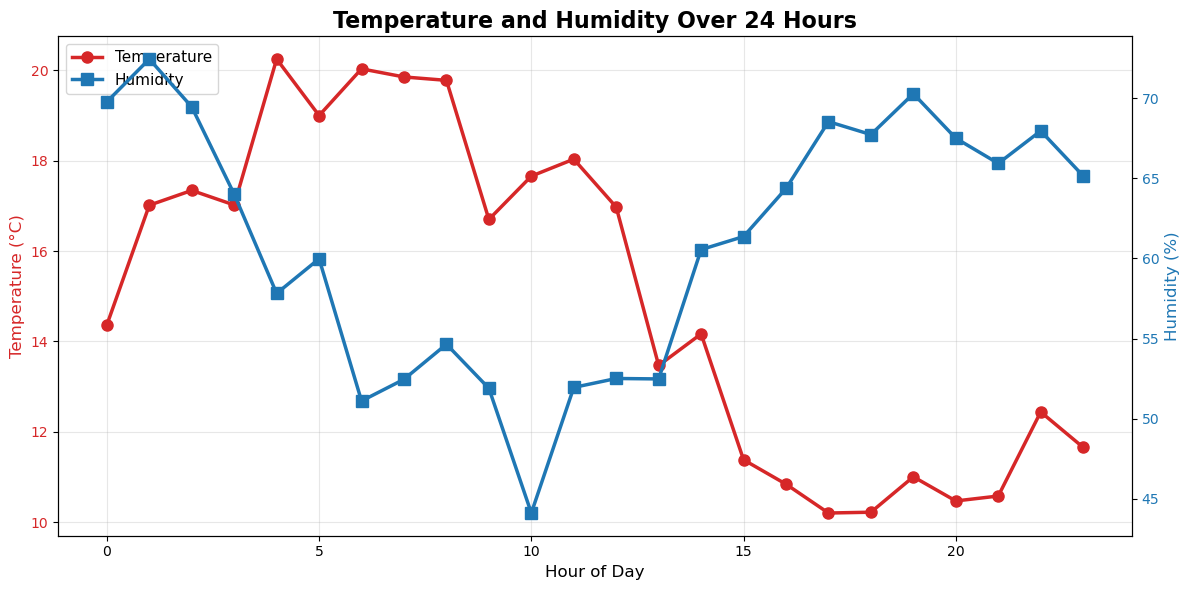


Example 2: Fill Between Lines (Confidence Interval)


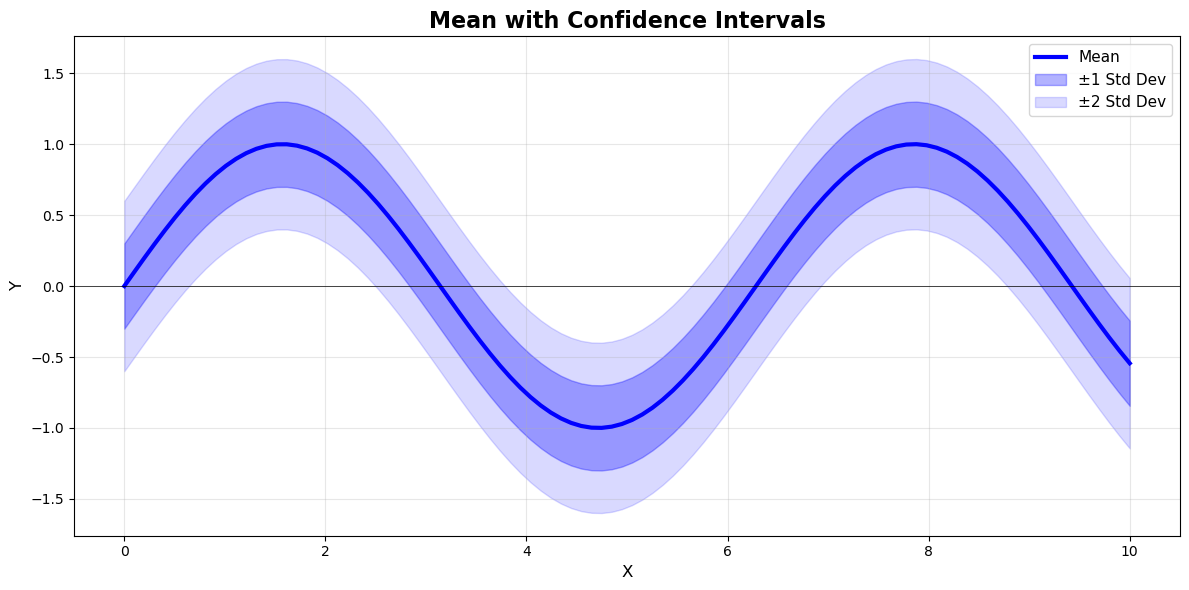


Example 3: Reference Lines and Shaded Regions


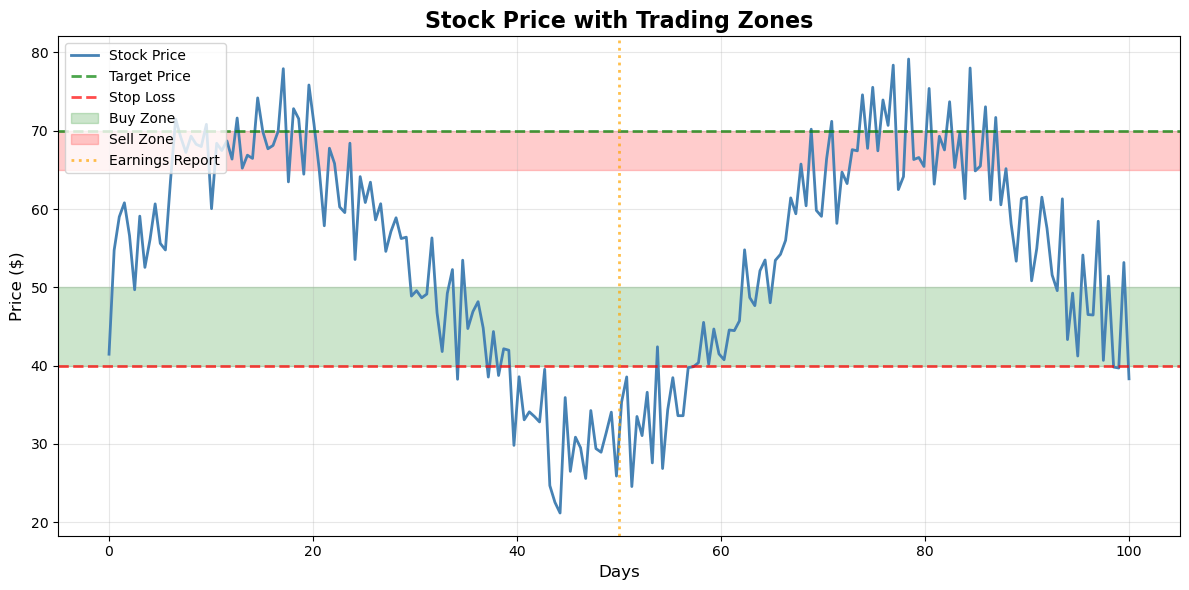


Example 4: Error Bars (Experimental Data)


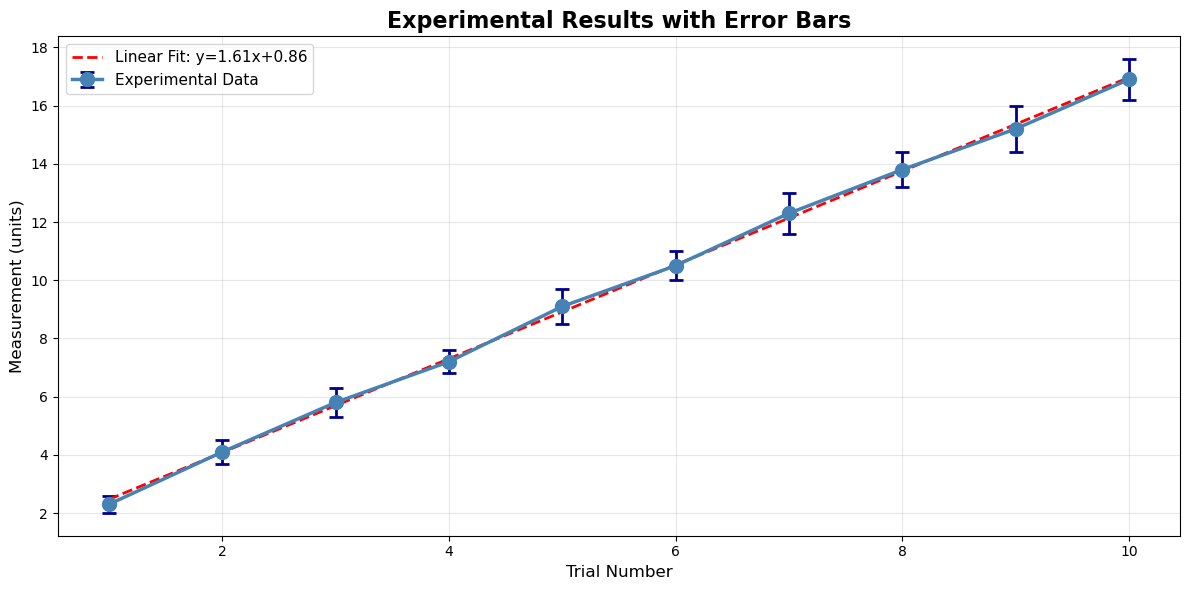


✅ Advanced techniques complete!


In [8]:
print("=== ADVANCED TECHNIQUES ===\n")

# Example 1: Multiple Y-axes (twinx)
print("Example 1: Multiple Y-Axes (Temperature and Humidity)")

fig, ax1 = plt.subplots(figsize=(12, 6))

x = np.arange(24)
temperature = 15 + 5 * np.sin(x / 4) + np.random.randn(24) * 1
humidity = 60 + 10 * np.cos(x / 3) + np.random.randn(24) * 3

# Temperature on left y-axis
color1 = 'tab:red'
ax1.plot(x, temperature, 'o-', color=color1, linewidth=2.5, 
         markersize=8, label='Temperature')
ax1.set_xlabel('Hour of Day', fontsize=12)
ax1.set_ylabel('Temperature (°C)', fontsize=12, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)

# Humidity on right y-axis
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.plot(x, humidity, 's-', color=color2, linewidth=2.5,
         markersize=8, label='Humidity')
ax2.set_ylabel('Humidity (%)', fontsize=12, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

ax1.set_title('Temperature and Humidity Over 24 Hours', 
              fontsize=16, fontweight='bold')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

plt.tight_layout()
plt.show()

# Example 2: Fill between lines
print("\n" + "="*70)
print("Example 2: Fill Between Lines (Confidence Interval)")
print("="*70)

fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(0, 10, 100)
y_mean = np.sin(x)
y_std = 0.3
y_upper = y_mean + y_std
y_lower = y_mean - y_std

# Main line
ax.plot(x, y_mean, 'b-', linewidth=3, label='Mean')

# Confidence interval
ax.fill_between(x, y_lower, y_upper, alpha=0.3, color='blue', 
                label='±1 Std Dev')

# Additional bounds
y_upper2 = y_mean + 2*y_std
y_lower2 = y_mean - 2*y_std
ax.fill_between(x, y_lower2, y_upper2, alpha=0.15, color='blue',
                label='±2 Std Dev')

ax.set_title('Mean with Confidence Intervals', fontsize=16, fontweight='bold')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

# Example 3: Reference lines and regions
print("\n" + "="*70)
print("Example 3: Reference Lines and Shaded Regions")
print("="*70)

fig, ax = plt.subplots(figsize=(12, 6))

x = np.linspace(0, 100, 200)
y = 50 + 20 * np.sin(x / 10) + np.random.randn(200) * 5

ax.plot(x, y, linewidth=2, color='steelblue', label='Stock Price')

# Target price
ax.axhline(y=70, color='green', linestyle='--', linewidth=2, 
           label='Target Price', alpha=0.7)

# Stop loss
ax.axhline(y=40, color='red', linestyle='--', linewidth=2,
           label='Stop Loss', alpha=0.7)

# Buy zone (shaded region)
ax.axhspan(40, 50, alpha=0.2, color='green', label='Buy Zone')

# Sell zone
ax.axhspan(65, 70, alpha=0.2, color='red', label='Sell Zone')

# Important event
ax.axvline(x=50, color='orange', linestyle=':', linewidth=2,
           label='Earnings Report', alpha=0.7)

ax.set_title('Stock Price with Trading Zones', fontsize=16, fontweight='bold')
ax.set_xlabel('Days', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Example 4: Error bars
print("\n" + "="*70)
print("Example 4: Error Bars (Experimental Data)")
print("="*70)

fig, ax = plt.subplots(figsize=(12, 6))

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.3, 4.1, 5.8, 7.2, 9.1, 10.5, 12.3, 13.8, 15.2, 16.9])
yerr = np.array([0.3, 0.4, 0.5, 0.4, 0.6, 0.5, 0.7, 0.6, 0.8, 0.7])

ax.errorbar(x, y, yerr=yerr, fmt='o-', linewidth=2.5, markersize=10,
            capsize=5, capthick=2, color='steelblue',
            ecolor='darkblue', elinewidth=2, label='Experimental Data')

# Fit line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x, p(x), 'r--', linewidth=2, label=f'Linear Fit: y={z[0]:.2f}x+{z[1]:.2f}')

ax.set_title('Experimental Results with Error Bars', 
             fontsize=16, fontweight='bold')
ax.set_xlabel('Trial Number', fontsize=12)
ax.set_ylabel('Measurement (units)', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Advanced techniques complete!")

## Practice Exercises

### Beginner Level

**1. Basic Line Plot**
```
Create a line plot of y = 2x + 3 for x from 0 to 10.
Requirements:
  • Use 50 points
  • Line width 2.5
  • Blue color
  • Add title and labels
```

**2. Multiple Lines**
```
Plot y = sin(x), y = sin(2x), and y = sin(3x) for x ∈ [0, 2π]
Requirements:
  • Different colors
  • Add legend
  • Grid enabled
```

**3. Custom Styling**
```
Plot exponential growth y = e^(x/2) for x ∈ [0, 10]
Requirements:
  • Red dashed line
  • Circle markers every 5th point
  • Line width 2
  • Marker size 8
```

**4. Temperature Plot**
```
Create monthly temperature data and plot it.
Requirements:
  • 12 data points (months)
  • Line with markers
  • Label x-axis with month names
  • Add average temperature line
```

**5. Transparency**
```
Plot 5 overlapping sine waves with random phase shifts.
Requirements:
  • Use alpha=0.5 for transparency
  • Different colors
  • No legend (too many lines)
```

### Intermediate Level

**6. Sales Dashboard**
```
Create a sales plot showing:
  • Actual sales (solid line)
  • Predicted sales (dashed line)
  • Target line (horizontal reference)
Requirements:
  • Different colors and styles
  • Shaded region for target range
  • Legend
```

**7. Colorblind-Friendly**
```
Create a plot with 4 lines using colorblind-safe palette.
Requirements:
  • Use recommended safe colors
  • Different line styles too
  • Test with colorblindness simulator
```

**8. Confidence Intervals**
```
Plot a line with 95% confidence interval.
Requirements:
  • Main line (mean)
  • Shaded confidence band
  • Use fill_between()
  • Proper legend
```

**9. Dual Y-Axes**
```
Plot population and GDP on same x-axis with different y-axes.
Requirements:
  • Use twinx()
  • Color-code axes
  • Combined legend
```

**10. Custom Legend**
```
Create a plot with legend outside the plot area.
Requirements:
  • 6-8 lines
  • Legend on right side
  • 2 columns
  • Proper spacing
```

### Advanced Level

**11. Financial Chart**
```
Create a stock price chart with:
  • Price line
  • Moving averages (20 and 50 day)
  • Volume on secondary axis
  • Buy/sell signals marked
```

**12. Scientific Plot**
```
Create publication-ready plot:
  • Experimental data with error bars
  • Theoretical curve (smooth)
  • Residuals in subplot
  • Professional styling
```

**13. Time Series**
```
Plot daily data for one year:
  • Date formatting on x-axis
  • Seasonal markers
  • Trend line
  • Anomalies highlighted
```

**14. Comparison Dashboard**
```
Create 2x2 grid comparing different scenarios:
  • Consistent styling
  • Shared legend
  • Annotations
  • Professional layout
```

**15. Interactive Features**
```
Create an interactive line plot:
  • Toggle lines on/off via legend
  • Zoom and pan
  • Cursor data display
  • Export functionality
```

### Challenge Problems

**16. Real Data Analysis**
```
Download COVID-19 data and create:
  • Multiple country comparisons
  • Log scale for growth
  • Moving averages
  • Per capita normalization
```

**17. Animation**
```
Create an animated line plot:
  • Line grows over time
  • Save as GIF
  • Smooth animation
```

**18. Custom Style Sheet**
```
Create a custom matplotlib style:
  • Corporate colors
  • Custom fonts
  • Default line styles
  • Save as .mplstyle file
```

**19. Multi-Panel Figure**
```
Create a publication figure:
  • 6 subplots with different aspects
  • Panel labels (A, B, C, etc.)
  • Shared axes where appropriate
  • Single file, high resolution
```

**20. Performance Optimization**
```
Plot 10 million data points efficiently:
  • Use downsampling
  • Test different methods
  • Measure rendering time
  • Compare approaches
```

## Quick Reference Card

### Basic Line Plot

```python
# Simple
plt.plot(x, y)

# OOP (recommended)
fig, ax = plt.subplots()
ax.plot(x, y)
```

### Complete Line Plot Template

```python
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(x, y,
        color='steelblue',        # Color
        linestyle='-',            # Style: '-', '--', '-.', ':'
        linewidth=2,              # Width
        marker='o',               # Marker: 'o', 's', '^', etc.
        markersize=6,             # Marker size
        markerfacecolor='coral',  # Marker fill
        markeredgecolor='red',    # Marker edge
        markeredgewidth=1,        # Marker edge width
        markevery=5,              # Show every 5th marker
        alpha=0.8,                # Transparency (0-1)
        label='My Data',          # Legend label
        zorder=2)                 # Drawing order

ax.set_title('Title', fontsize=16, fontweight='bold')
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
```

### Line Styles

```python
'-'   # Solid (default)
'--'  # Dashed
'-.'  # Dash-dot
':'   # Dotted
''    # No line
```

### Colors

```python
# Single character
'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'

# Named
'blue', 'steelblue', 'coral', 'orange', 'purple'

# Hex
'#FF5733'

# RGB tuple
(0.5, 0.2, 0.8)

# Default cycle
'C0', 'C1', 'C2', ..., 'C9'
```

### Markers

```python
'.'   # Point           's'   # Square
'o'   # Circle          'D'   # Diamond
'^'   # Triangle up     '*'   # Star
'v'   # Triangle down   '+'   # Plus
'<'   # Triangle left   'x'   # X
'>'   # Triangle right  '|'   # Vline
```

### Format String Shorthand

```python
# [color][marker][linestyle]
'ro-'   # Red, circle, solid
'b^--'  # Blue, triangle, dashed
'gs:'   # Green, square, dotted
'k*-.'  # Black, star, dash-dot
```

### Multiple Lines

```python
# Method 1: Separate calls
ax.plot(x, y1, label='Line 1')
ax.plot(x, y2, label='Line 2')

# Method 2: Single call
ax.plot(x, y1, x, y2, x, y3)

# Method 3: Loop
for i, y in enumerate(data):
    ax.plot(x, y, label=f'Line {i}')
```

### Legend

```python
# Basic
ax.legend()

# Positioned
ax.legend(loc='upper right')  # or 'best'

# Customized
ax.legend(loc='best', fontsize=10, frameon=True,
          framealpha=0.9, ncol=2, title='Legend')

# Outside plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
```

### Grid

```python
ax.grid(True)                              # Basic
ax.grid(True, alpha=0.3)                   # Transparent
ax.grid(True, linestyle='--', alpha=0.5)   # Dashed
ax.grid(True, which='both')                # Major & minor
```

### Axis Limits

```python
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)
ax.set_xlim([0, 10])  # Also works
```

### Reference Lines

```python
# Horizontal
ax.axhline(y=0, color='k', linestyle='--')

# Vertical
ax.axvline(x=5, color='r', linestyle='--')

# Horizontal span
ax.axhspan(ymin, ymax, alpha=0.2, color='gray')

# Vertical span
ax.axvspan(xmin, xmax, alpha=0.2, color='yellow')
```

### Fill Between

```python
# Between two lines
ax.fill_between(x, y1, y2, alpha=0.3)

# Conditional fill
ax.fill_between(x, y, 0, where=(y > 0), alpha=0.3)
```

### Multiple Y-Axes

```python
fig, ax1 = plt.subplots()

ax1.plot(x, y1, 'b-')
ax1.set_ylabel('Y1', color='b')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('Y2', color='r')
```

### Error Bars

```python
ax.errorbar(x, y, yerr=error, fmt='o-', 
            capsize=5, capthick=2)
```

### Log Scale

```python
ax.set_yscale('log')   # Y-axis
ax.set_xscale('log')   # X-axis
```

### Saving

```python
plt.savefig('plot.png', dpi=300, bbox_inches='tight')
plt.savefig('plot.pdf', bbox_inches='tight')
```

### Common Patterns

**Time Series:**
```python
ax.plot(dates, values, linewidth=2)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
```

**Comparison:**
```python
ax.plot(x, actual, 'o-', label='Actual')
ax.plot(x, predicted, 's--', label='Predicted')
ax.legend()
```

**Emphasis:**
```python
# Background data
ax.plot(x, y_bg, lw=1, alpha=0.3, color='gray')
# Main data
ax.plot(x, y_main, lw=3, alpha=1.0, color='red')
```

## Summary

### What We Learned 🎓

**1. Basic Line Plots**
- Single and multiple lines
- Different data types (lists, arrays, pandas)
- Key parameters and options

**2. Line Styles**
- Built-in styles: solid, dashed, dotted, dash-dot
- Custom dash patterns
- When to use each style

**3. Colors**
- Single character, named, hex, RGB
- Default color cycle (C0-C9)
- Colorblind-friendly palettes
- Professional color schemes

**4. Markers**
- All marker types
- Customization (size, colors, edges)
- markevery parameter
- Best practices

**5. Line Width & Transparency**
- Line width guidelines
- Alpha values for transparency
- Creating visual hierarchy
- Context-specific recommendations

**6. Legends**
- Positioning options
- Customization parameters
- Multiple legends
- Outside placement

**7. Advanced Techniques**
- Multiple y-axes (twinx)
- Fill between lines
- Confidence intervals
- Reference lines and regions
- Error bars
- Log scales

---

### Key Takeaways 💡

**Best Practices:**
```
✓ Use linewidth=2-3 for presentations
✓ Use linewidth=1.5-2 for publications
✓ Add transparency for overlapping lines
✓ Use markers sparingly (< 20 points)
✓ Always add legend for multiple lines
✓ Consider colorblind users
✓ Use appropriate line styles
✓ Create visual hierarchy
```

**Common Mistakes to Avoid:**
```
✗ Too many markers (cluttered)
✗ Thin lines for presentations
✗ Red-green only combinations
✗ Too many overlapping opaque lines
✗ Missing labels or legend
✗ Inconsistent styling
```

**Quick Decision Guide:**

| Scenario | Recommendation |
|----------|----------------|
| Presentation | lw=2.5-3, bold colors |
| Publication | lw=1.5-2, standard colors |
| Web/Dashboard | lw=2, alpha=0.8 |
| Overlapping lines | alpha=0.3-0.5 |
| Time series | Solid lines, no markers |
| Discrete data | Lines with markers |
| Comparisons | Different styles + colors |
| Emphasis | Vary width + alpha |

---

### Essential Code Patterns

**Pattern 1: Basic Time Series**
```python
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, values, linewidth=2, color='steelblue')
ax.set_title('Title', fontsize=16, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.grid(True, alpha=0.3)
plt.tight_layout()
```

**Pattern 2: Comparison Plot**
```python
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, actual, 'o-', linewidth=2, label='Actual')
ax.plot(x, predicted, 's--', linewidth=2, label='Predicted')
ax.legend(loc='best', fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
```

**Pattern 3: Confidence Interval**
```python
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, mean, linewidth=2.5, label='Mean')
ax.fill_between(x, lower, upper, alpha=0.3, label='95% CI')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
plt.tight_layout()
```

**Pattern 4: Dual Y-Axes**
```python
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(x, y1, 'b-', linewidth=2)
ax1.set_ylabel('Y1', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-', linewidth=2)
ax2.set_ylabel('Y2', color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.tight_layout()
```

---

### Next Steps 🚀

You've mastered line plots! Next notebooks:

1. **03_customization_basics.ipynb** - Advanced customization
2. **04_scatter_plots.ipynb** - Scatter plots
3. **05_bar_charts.ipynb** - Bar charts
4. **06_histograms.ipynb** - Histograms

---

### Resources 📚

- **Line plots docs**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
- **Color names**: https://matplotlib.org/stable/gallery/color/named_colors.html
- **Colorblind palettes**: https://colorbrewer2.org/
- **Line styles**: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html

---

**Congratulations! You've mastered line plots in Matplotlib! 🎉**

Practice with the exercises and real data to solidify your skills!